In [1]:
# warning 제거 
import warnings 
warnings.filterwarnings(action='ignore')


import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer 
import numpy as np

# 한글 폰트
import platform

def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [2]:
# 데이터 로드
movie = pd.read_csv('merge.csv')
oscar = pd.read_csv("oscar.csv")

In [3]:
# 데이터 전처리 과정 추가

In [4]:
movie.loc[(movie.budget == 89.0 ), 'budget'] = 88831.0

In [5]:
movie.reset_index(drop=True)
movie = movie.drop(['Unnamed: 0'], axis=1)
oscar = oscar.drop(['Unnamed: 0'], axis=1)

In [6]:
movie.rename(columns = {'production_company_x' : 'production', 
                        'actors_y' : 'actors' }, inplace=True)

In [7]:
"""
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
"""

"\npd.set_option('display.max_columns', None)\npd.set_option('display.max_rows', None)\n"

In [8]:
def split_first(row):
    return row.str.split(',').str[0]

In [9]:
movie['genre_first'] = split_first(movie['genre'])

In [10]:
movie['budget'] = movie['budget'].str.replace("$","").str.replace(",","").str.replace(".","").astype('int')
movie['worldwide_gross_income'] = movie['worldwide_gross_income'].str.replace("$","").str.replace(",","").astype('int')

In [11]:
def production (row):
    disney = ['Walt Disney Animation Studios', 'Walt Disney Pictures', 'Pixar Animation Studios']
    searchlight = ['Fox Searchlight Pictures']
    fox = ['20th Century Fox Film Corporation', 'Twentieth Century Fox', 'Twentieth Century Fox Animation']
    marvel = ['Marvel Studios', 'Marvel Entertainment', 'Marvel Enterprises']
    dreamworks = ['DreamWorks', 'DreamWorks Animation']
    atlas = ['Atlas Entertainment', 'Atlas Productions', 'Atlas Independent']
    pathe = ['Path챕', 'Path챕 Pictures International']
    liongate = ['Lionsgate', 'Lionsgate Premiere']
    warnerbros = ['Warner Bros.', 'Warner Bros. Pictures', 'Warner Bros. Digital Distribution', 'Warner Animation Group',
                  'Warner Bros. Animation']
    twodux2 = ['2DUX짼']
    sony = ['Sony Pictures Classics', 'Sony Pictures Entertainment (SPE)', 'Sony Pictures Animation']
    paramount = ['Paramount Players', 'Paramount Pictures', 'Paramount Vantage', 'Paramount Animation']
    
    if row in disney:
        return 'Walt Disney'
    if row in searchlight:
        return 'Searchlight Pictures'
    if row in fox:
        return 'Twentieth Century Fox'
    if row in marvel:
        return 'Marvel Studios'
    if row in dreamworks:
        return 'DreamWorks'
    if row in atlas:
        return 'Atlas Entertainment'
    if row in pathe:
        return 'Pathe'
    if row in liongate:
        return 'Lionsgate'
    if row in warnerbros:
        return 'Warner Bros.'
    if row in twodux2:
        return '2DUX2'
    if row in sony:
        return 'Sony Pictures'
    if row in paramount:
        return 'Paramount Pictures'
    else:
        return row

In [12]:
movie['production'] = movie['production'].apply(production)

In [13]:
#### 바이올린 플롯 추가

In [14]:
movie

title               original_title  \
0                                  In My Sleep                  In My Sleep   
1                                  On the Road                  On the Road   
2                            La preda perfetta  A Walk Among the Tombstones   
3                               Jurassic World               Jurassic World   
4     The Rum Diary - Cronache di una passione                The Rum Diary   
...                                        ...                          ...   
1750      Midsommar - Il villaggio dei dannati                    Midsommar   
1751             Cena con delitto - Knives Out                   Knives Out   
1752                                 Unplanned                    Unplanned   
1753                                Blue Story                   Blue Story   
1754                                      Jexi                         Jexi   

      year date_published                      genre  duration  \
0     2010      2010.4.23   Drama, Mystery, Thriller       104   
1     2012     2012.10.11  Adventure, Drama, Romance       124   
2     2014      2014.9.18       Action, Crime, Drama       114   
3     2015      2015.6.11  Action, Adventure, Sci-Fi       124   
4     2011      2012.4.24              Comedy, Drama       119   
...    ...            ...                        ...       ...   
1750  2019      2019.7.25     Drama, Horror, Mystery       148   
1751  2019      2019.12.5       Comedy, Crime, Drama       130   
1752  2019      2019.3.29           Biography, Drama       109   
1753  2019     2019.11.22               Crime, Drama        91   
1754  2019     2019.10.11            Comedy, Romance        84   

                                                country  \
0                                                   USA   
1     France, USA, UK, Mexico, Canada, Brazil, Germa...   
2                                                   USA   
3                                                   USA   
4                                               USA, UK   
...                                                 ...   
1750                                        USA, Sweden   
1751                                                USA   
1752                                                USA   
1753                                                 UK   
1754                                        USA, Canada   

                             language                       director  \
0                             English                     Allen Wolf   
1                     English, French                  Walter Salles   
2     English, Spanish, Urdu, Russian                    Scott Frank   
3                             English                Colin Trevorrow   
4            English, Spanish, German                 Bruce Robinson   
...                               ...                            ...   
1750                 English, Swedish                      Ari Aster   
1751          English, Spanish, Hindi                   Rian Johnson   
1752                          English  Chuck Konzelman, Cary Solomon   
1753                          English                         Rapman   
1754                          English         Jon Lucas, Scott Moore   

                                  writer                        production  \
0                             Allen Wolf             Morning Star Pictures   
1              Jack Kerouac, Jose Rivera                   MK2 Productions   
2            Lawrence Block, Scott Frank  1984 Private Defense Contractors   
3              Rick Jaffa, Amanda Silver                Universal Pictures   
4     Bruce Robinson, Hunter S. Thompson                          GK Films   
...                                  ...                               ...   
1750                           Ari Aster                               A24   
1751                        Rian Johnson                         Lionsgate   
1752       Abby Johnson

### 1. 제작사

#### 0. 제작사별 영화수

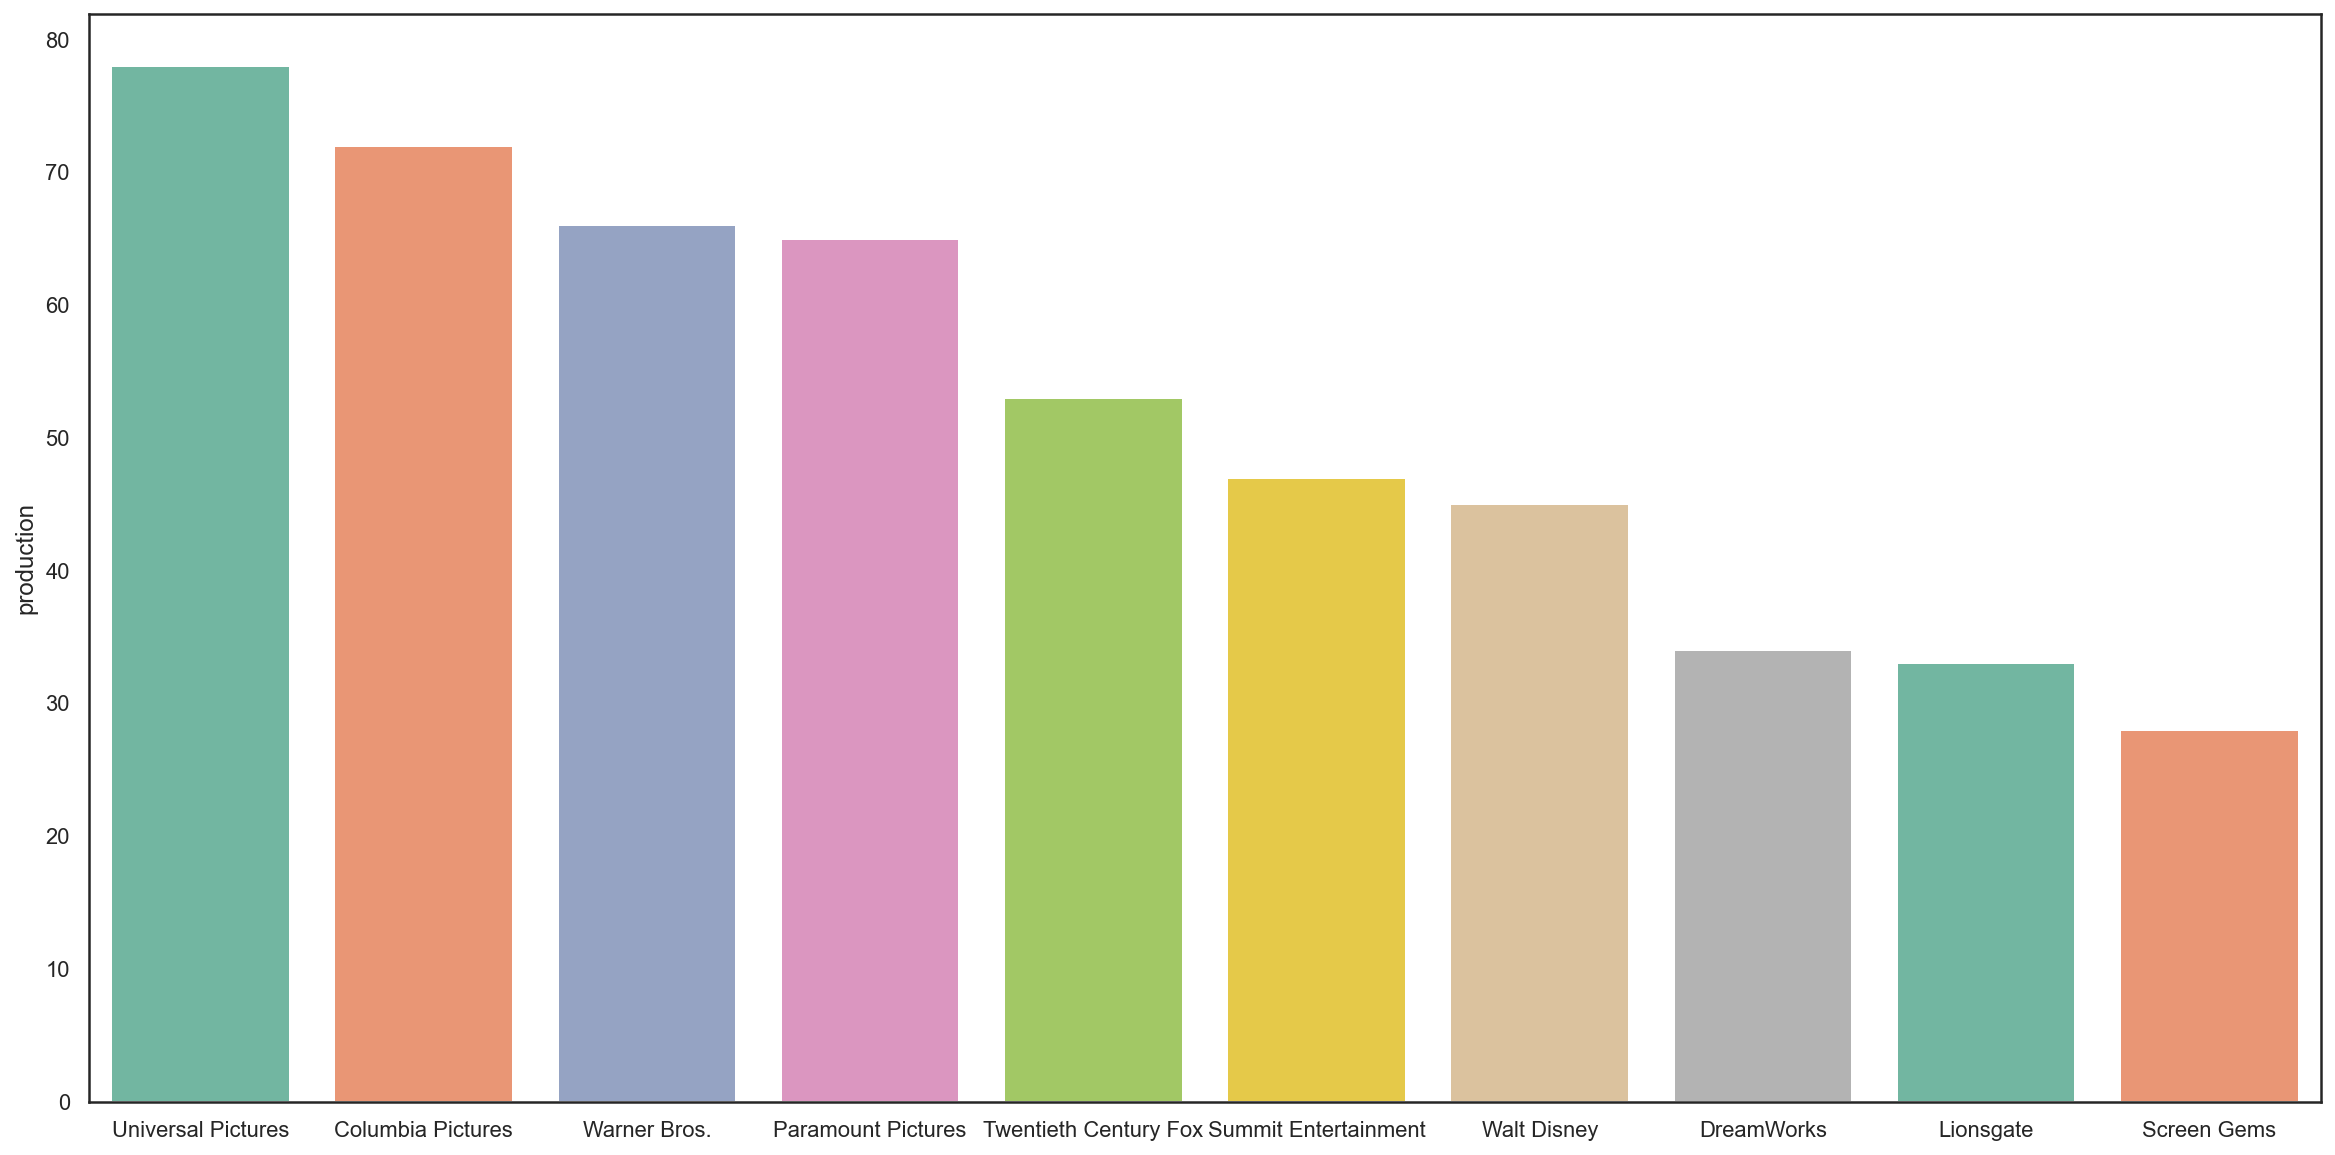

In [15]:
production_counts = movie['production'].value_counts().to_frame()
plt.figure(figsize=(20,10))
sns.barplot(production_counts.index[:10], production_counts['production'][:10],  palette="Set2")
plt.show();

In [16]:
is_top1 = movie.sort_values(by='worldwide_gross_income', ascending=False)
top1 = is_top1.groupby('production').head(1)
top10 = top1[:10]
fig =px.sunburst(
    top10,
    path =['original_title','production'],
    values='worldwide_gross_income')

In [17]:
#### 제작사별 매출이 가장 많은 영화
fig.show()

In [18]:
fig =px.sunburst(
    top10,
    path =['original_title','production'],
    values='budget')

In [19]:
#### 제작사별 예산이 가장 큰 영화
fig.show()

In [20]:
### 3. 등급
#### 0. 등급 분포

### 2. 등급

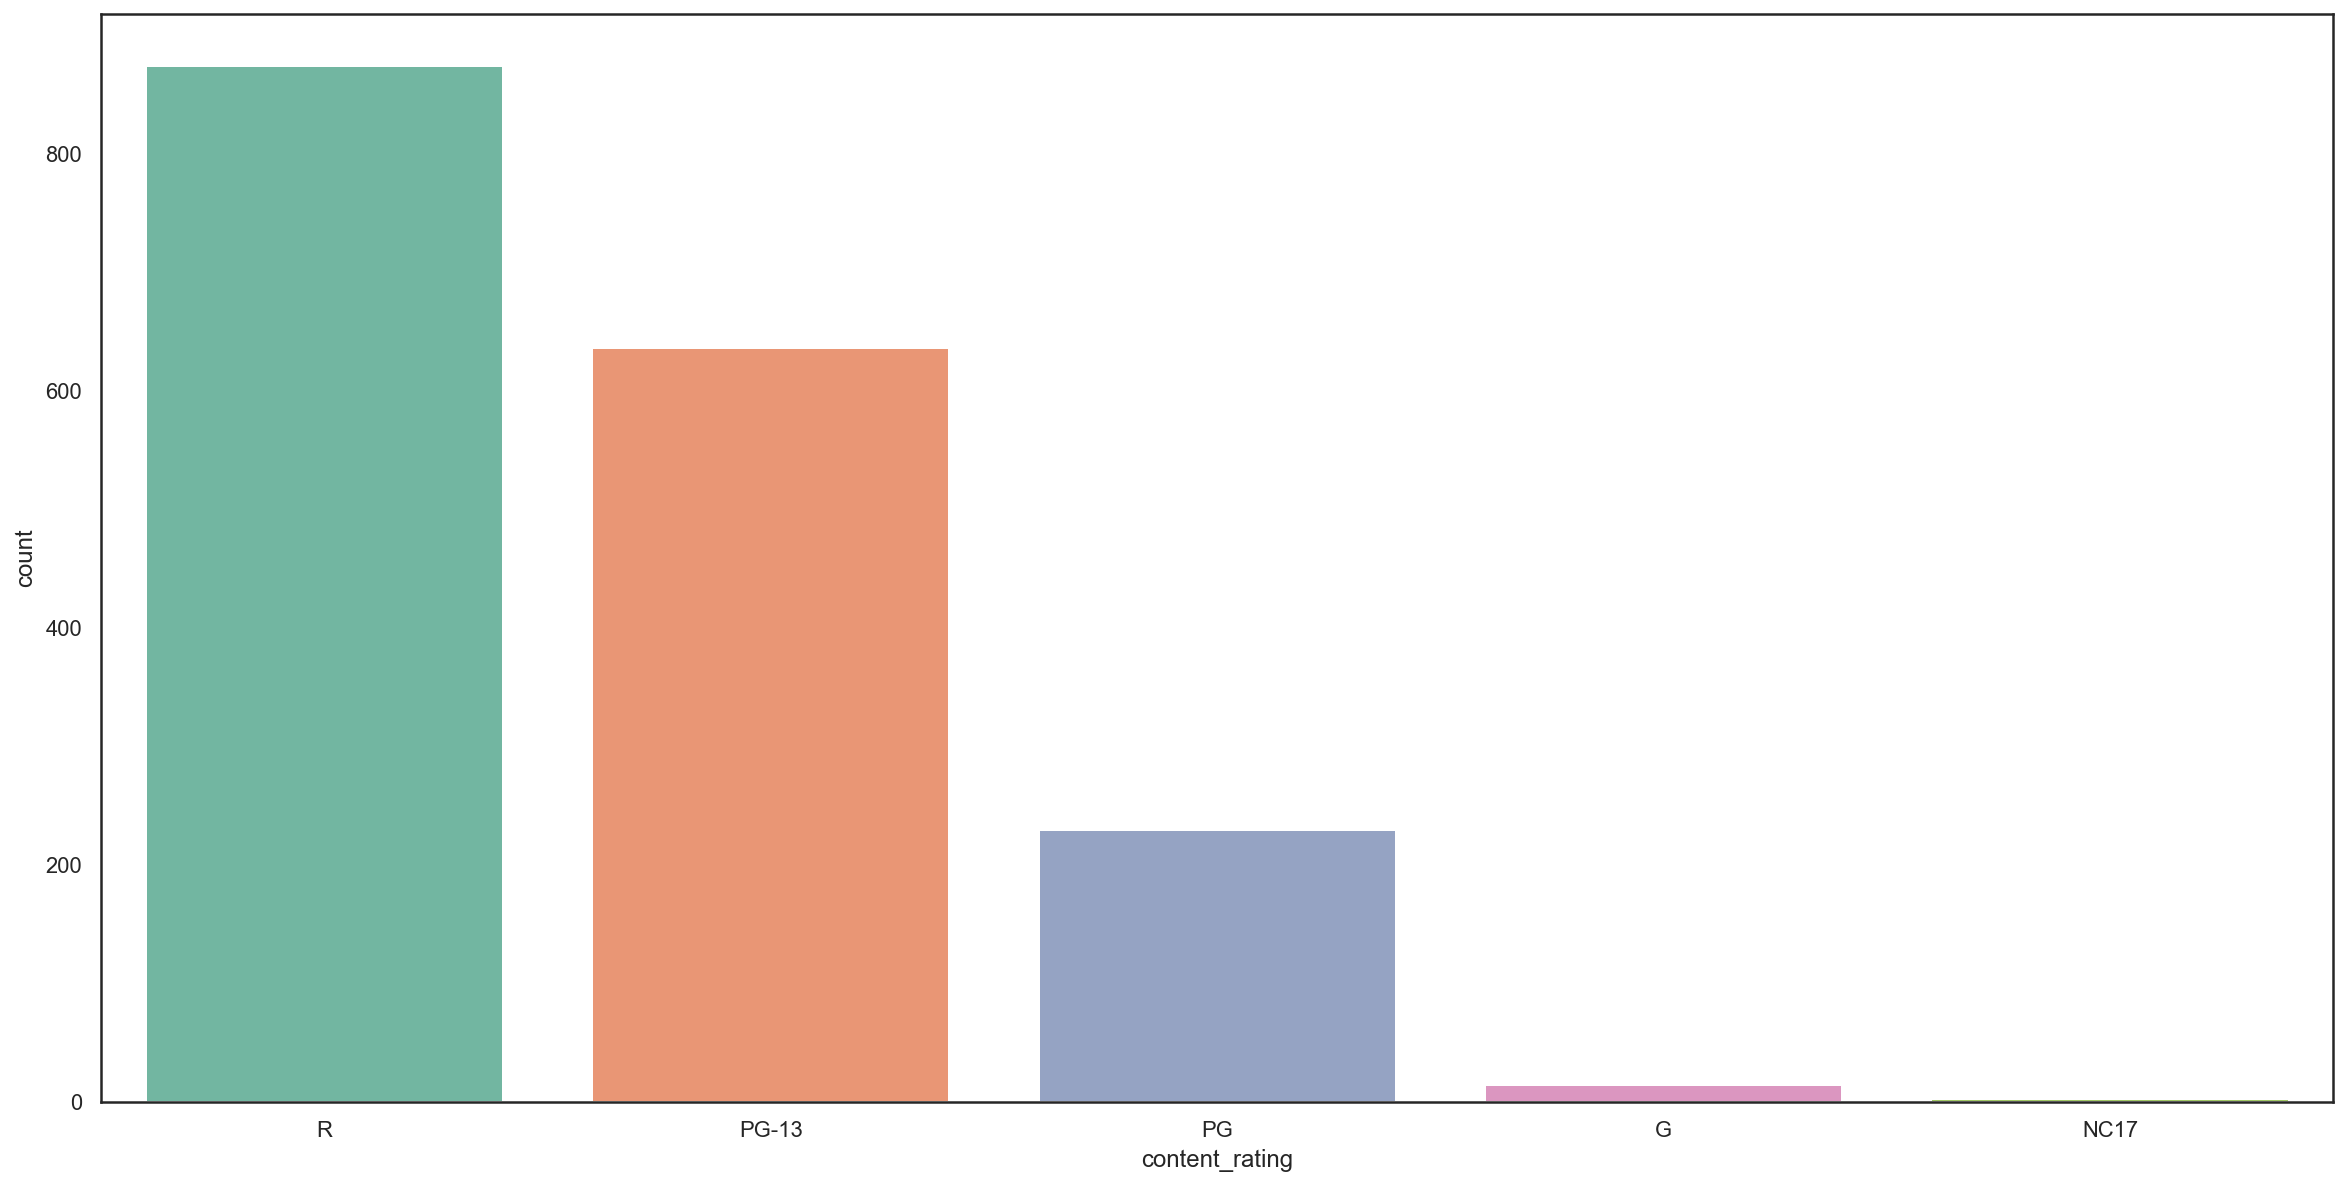

In [21]:
# 전체적인 등급 분포
plt.figure(figsize=(20,10))
sns.countplot(x="content_rating", data=movie, palette="Set2", order=movie['content_rating'].value_counts().index)
plt.show();

### 3. 장르

In [22]:
#### 장르간의 상관관계
def get_genre(data):
    data['genre2'] = data['genre'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))   
    test = data['genre2']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1%", vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    plt.show()

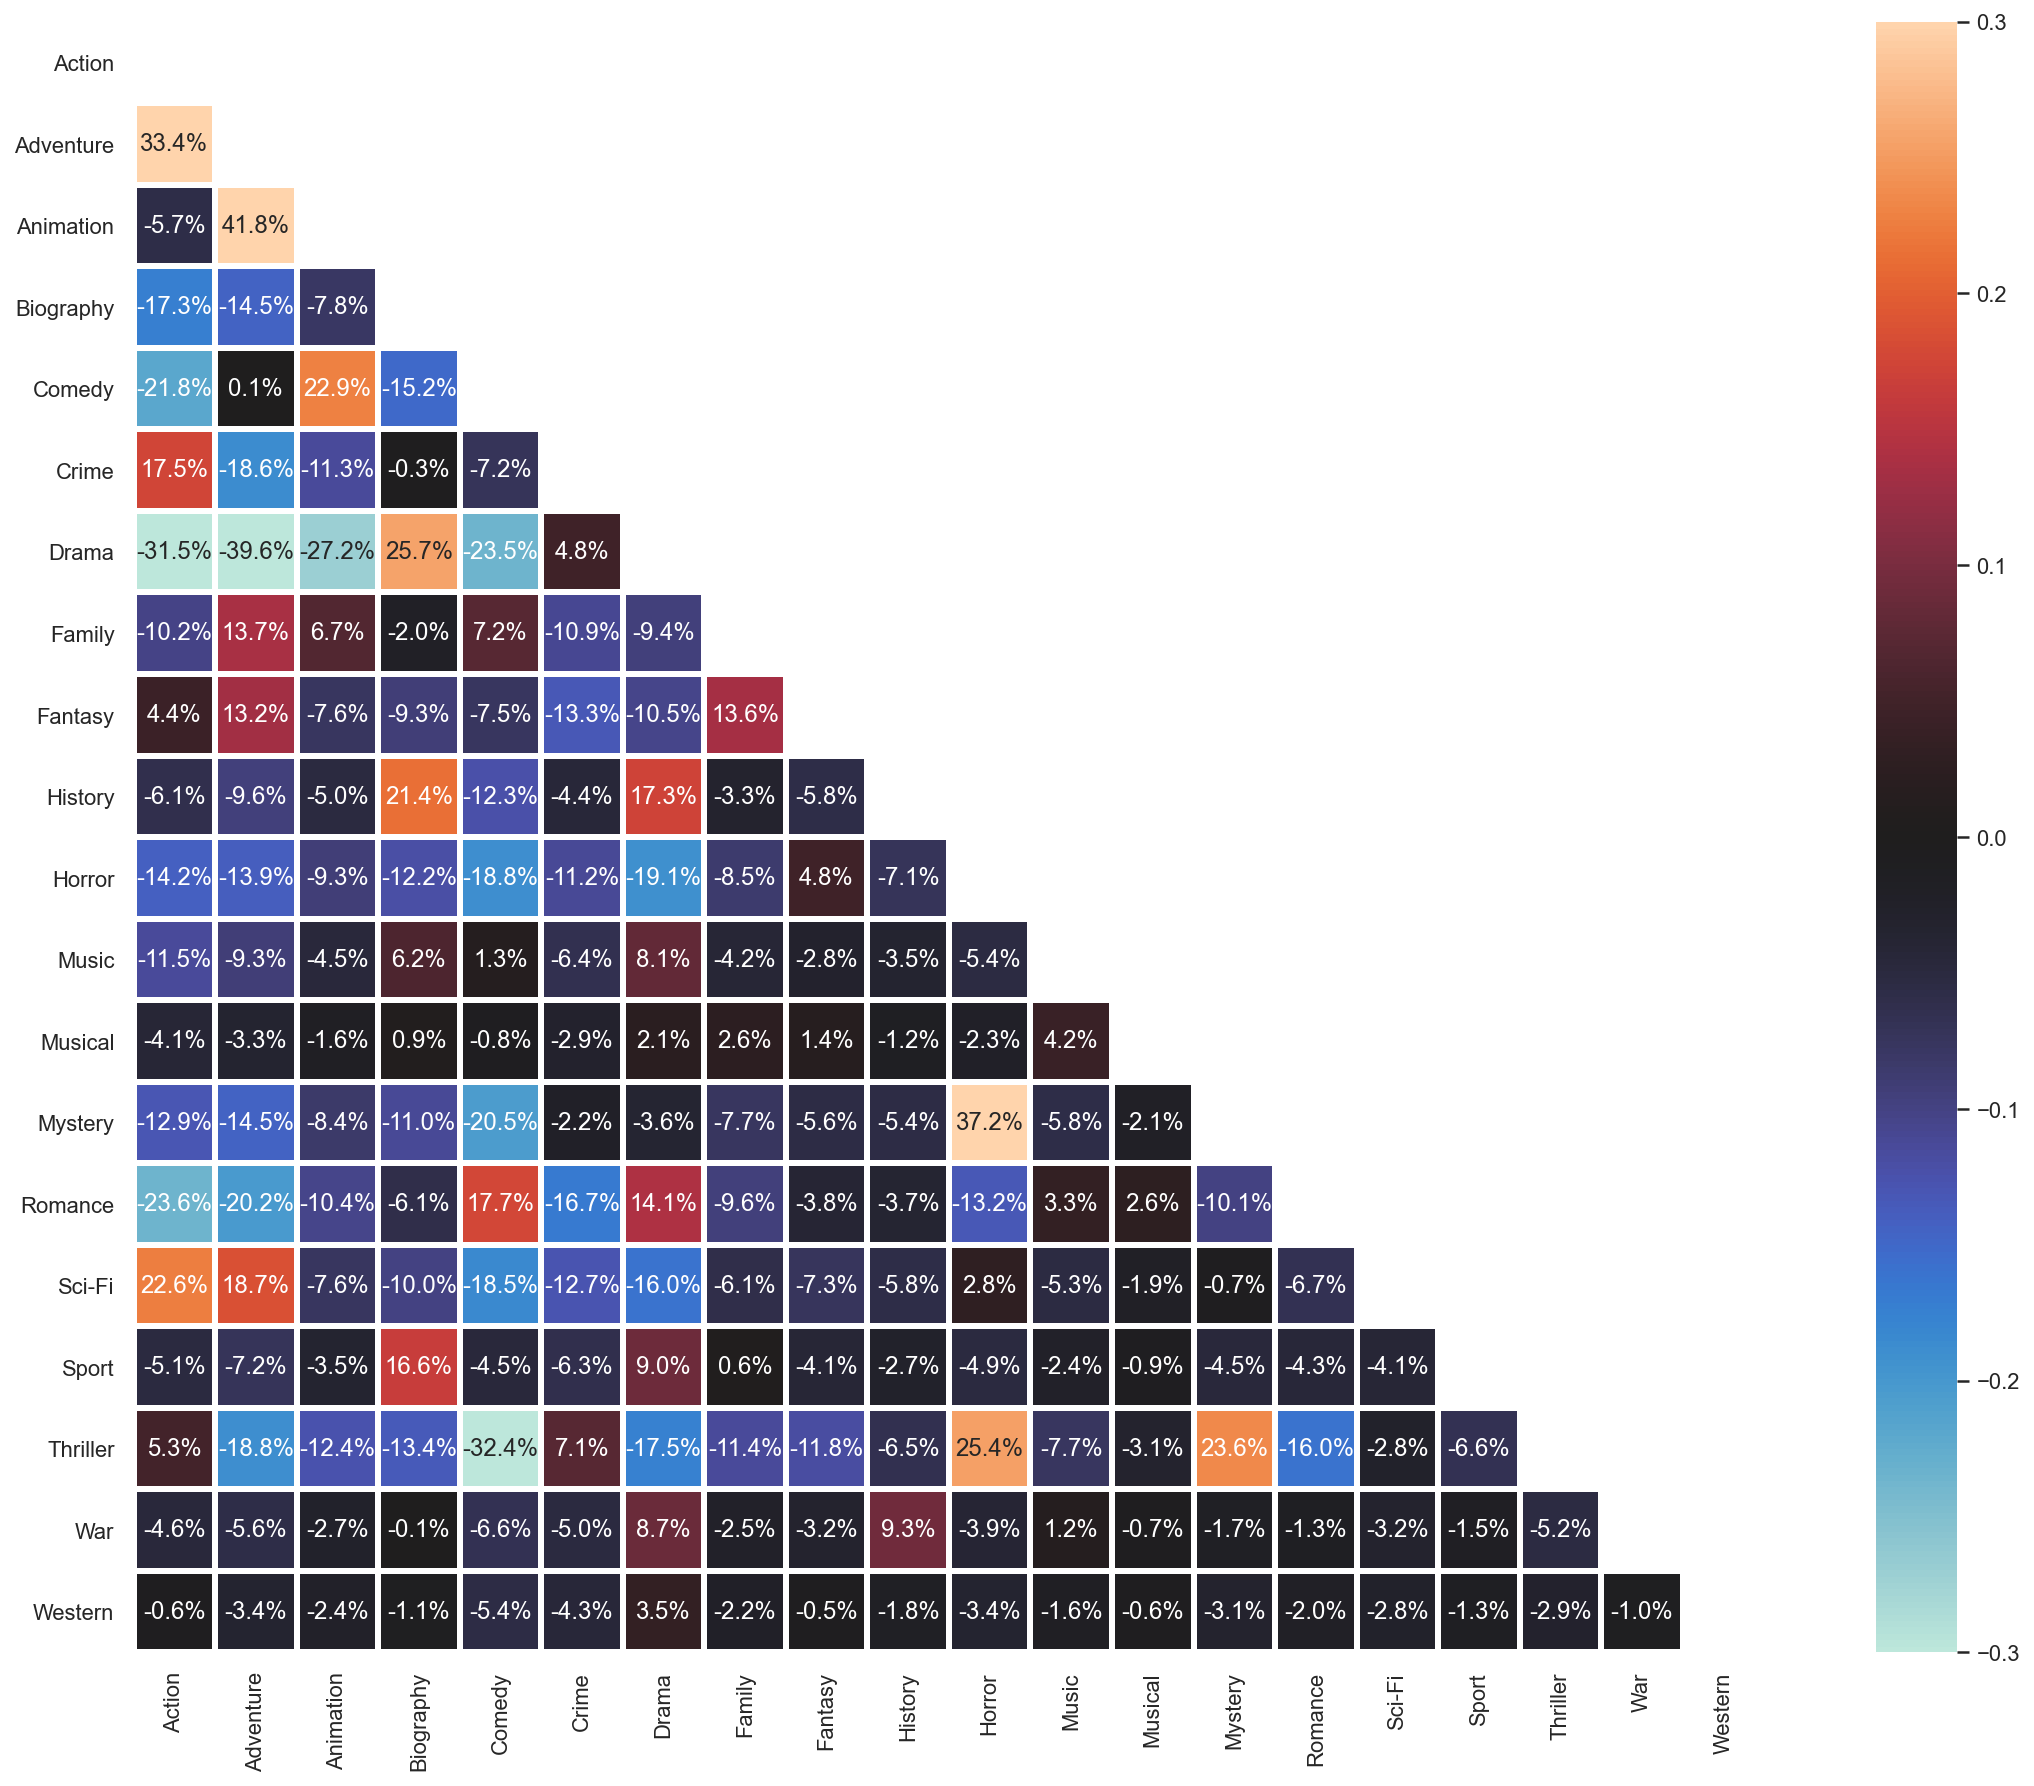

In [23]:
#### 장르간의 상관관계
get_genre(movie)

In [24]:
#### 3. 장르 분류화 
#### 4. 장르 분류화 데이터 적용

In [25]:
def split_first(row) :
    return row.str.split(',').str[0]

In [26]:
#### 장르와 등급 분포
def get_genre2(data):
    df = data[['content_rating', 'genre_first' ]]
    df = data.groupby('content_rating', sort=True)['genre_first'].value_counts().unstack()


    fig, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(df, annot=True, fmt="g", linewidths=2.5)
    plt.xlabel ('genre')
    plt.ylabel ('rating')
    plt.show();

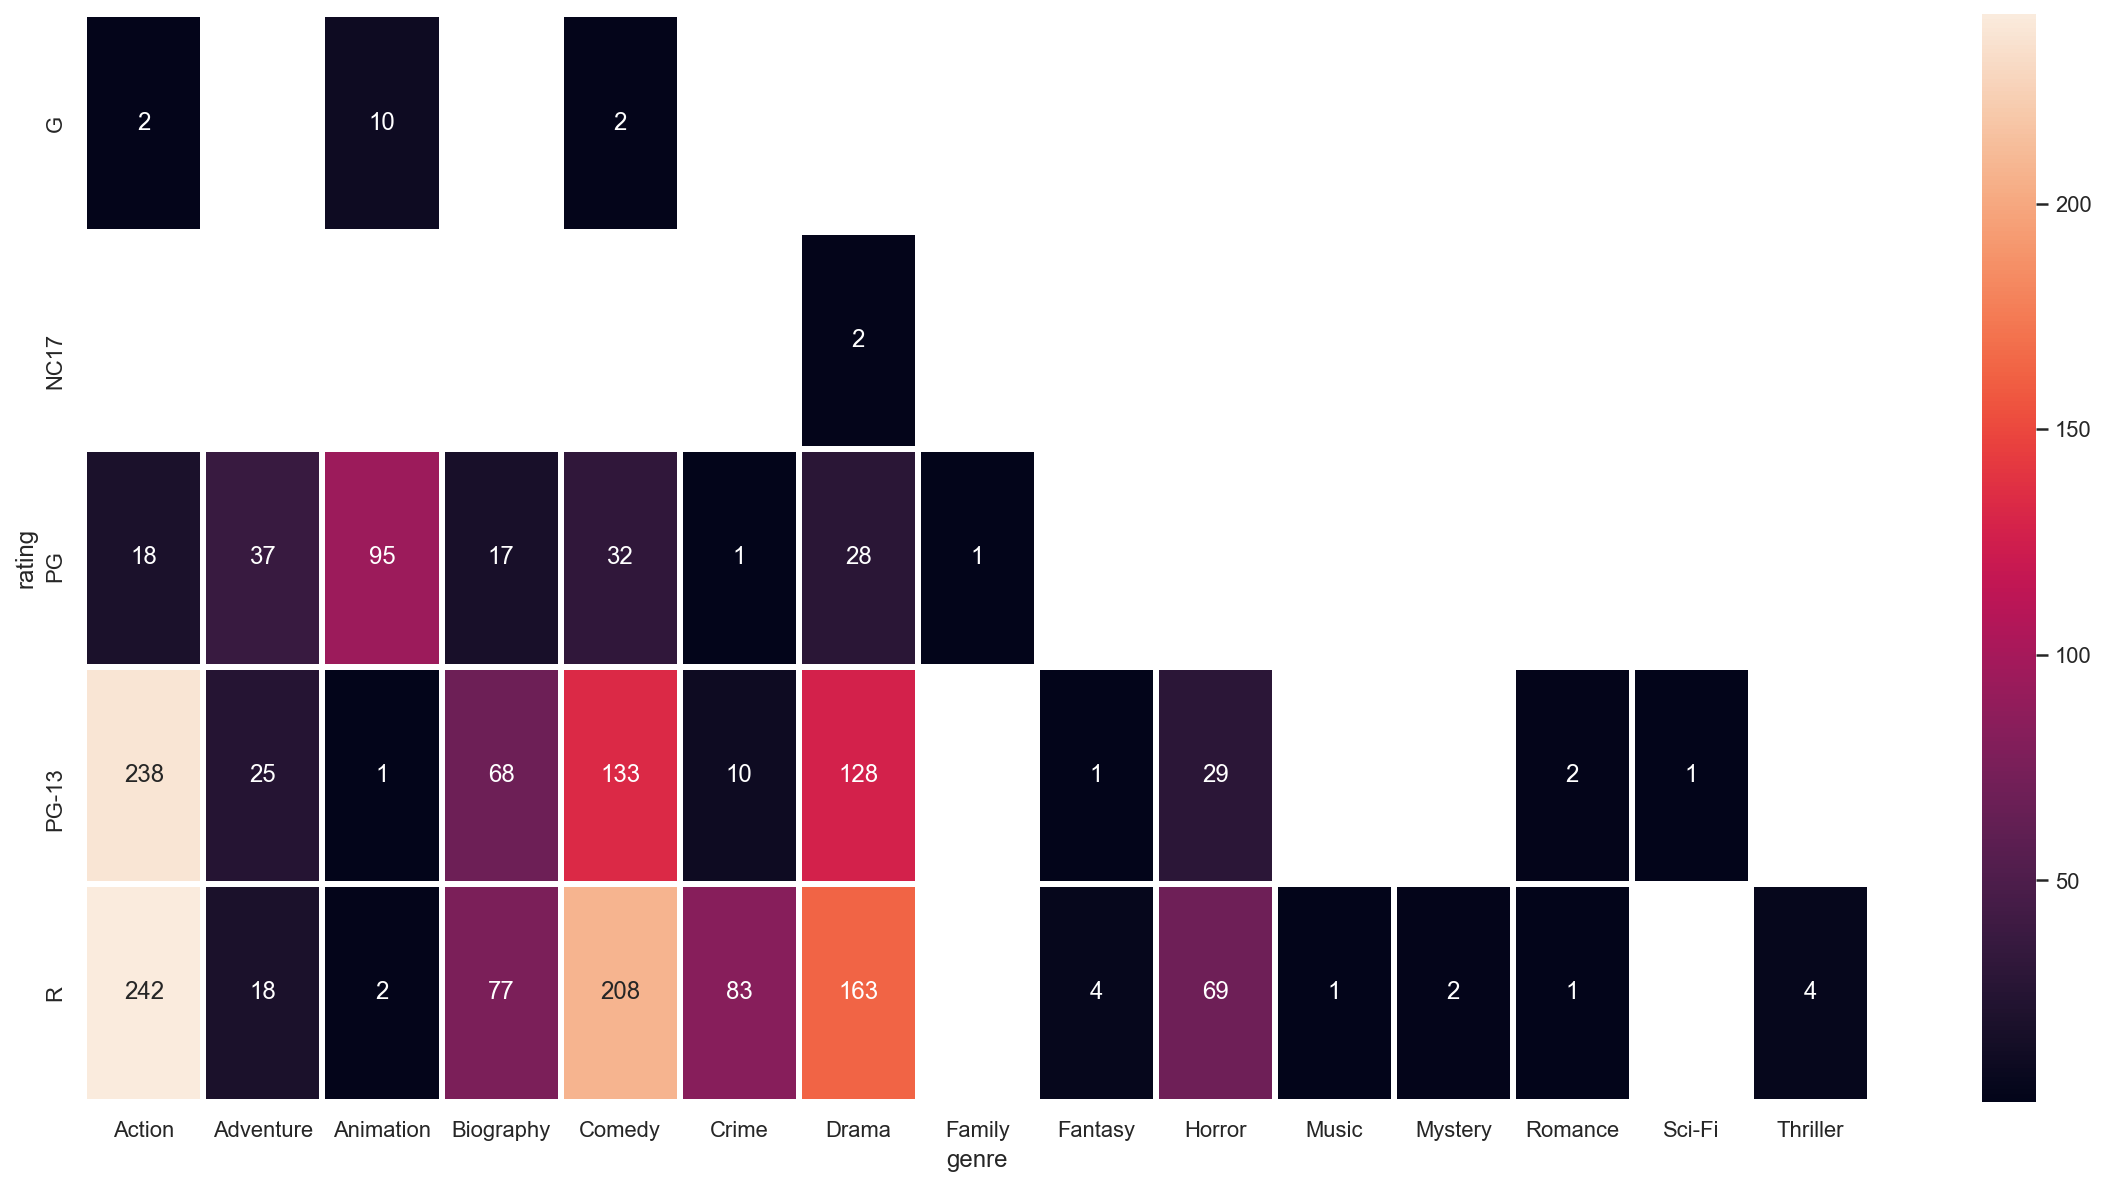

In [27]:
#### 장르와 등급 분포
get_genre2(movie)

### 4. 개봉 시기

In [28]:
movie['date_published'] = pd.to_datetime(movie['date_published'])
movie['month'] = movie['date_published'].apply(lambda date_published: date_published.month)

In [29]:
def month(row):
    if row == 1:
        return 'Jan'
    if row == 2:
        return 'Feb'
    if row == 3:
        return 'Mar'
    if row == 4:
        return 'Apr'
    if row == 5:
        return 'May'
    if row == 6:
        return 'Jun'
    if row == 7:
        return 'Jul'
    if row == 8:
        return 'Aug'
    if row == 9:
        return 'Sep'
    if row == 10:
        return 'Oct'
    if row == 11:
        return 'Nov'
    if row == 12:
        return 'Dec'

In [30]:
movie['month'] = movie['month'].apply(month)

In [31]:
#### 0. 제작 년도 분포
#### 1. 계절별 제작 영화 장르 분포 - 버블챠트 바차트 같이
is_season = movie['month'].value_counts().to_frame()
seasons = {'Jan' : 'Winter',
           'Feb' : 'Winter',
           'Mar' : 'Spring',
           'Apr' : 'Spring',
           'May' : 'Spring',
           'Jun' : 'Summer',
           'Jul' : 'Summer',
           'Aug' : 'Summer',
           'Sep' : 'Fall',
           'Oct' : 'Fall',
           'Nov' : 'Fall',
           'Dec' : 'Winter'}

In [32]:
def season(row):
    winter = ['Jan', 'Feb', 'Dec']
    spring = ['Mar', 'Apr', 'May']
    summer = ['Jun', 'Jul', 'Aug']
    fall = ['Sep', 'Oct', 'Nov']
    if row in winter:
        return 'Winter'
    if row in spring:
        return 'Spring'
    if row in summer:
        return 'Summer'
    if row in fall:
        return 'Fall'

In [33]:
movie['season'] = movie['month'].apply(season)

In [34]:
winter = movie[movie['season'] == 'Winter']
spring = movie[movie['season'] == 'Spring']
summer = movie[movie['season'] == 'Summer']
Fall = movie[movie['season'] == 'Fall']

In [35]:
winter_df = winter['genre_first'].value_counts()[:5].to_frame()
spring_df = spring['genre_first'].value_counts()[:5].to_frame()
summer_df = summer['genre_first'].value_counts()[:5].to_frame()
Fall_df = Fall['genre_first'].value_counts()[:5].to_frame()

In [36]:
import numpy as np
import matplotlib.pyplot as plt

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.
        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.
        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.
        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.
        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

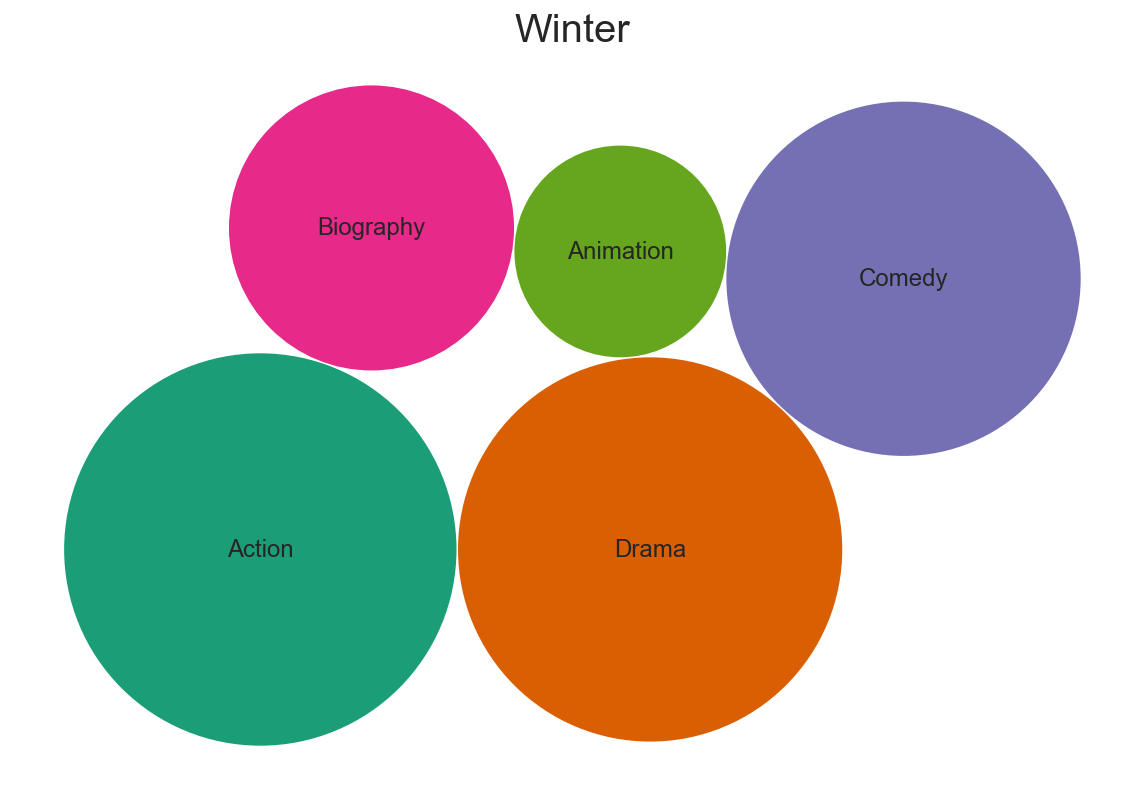

In [37]:
#### 계절별 제작 영화 장르 분포 
color = sns.color_palette('Dark2')
bubble_chart = BubbleChart(area=winter_df["genre_first"], bubble_spacing=0.1)
bubble_chart.collapse()
fig, ax = plt.subplots(figsize=(10,10),subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, winter_df.index, color )
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Winter',  fontsize = 20)
plt.show();

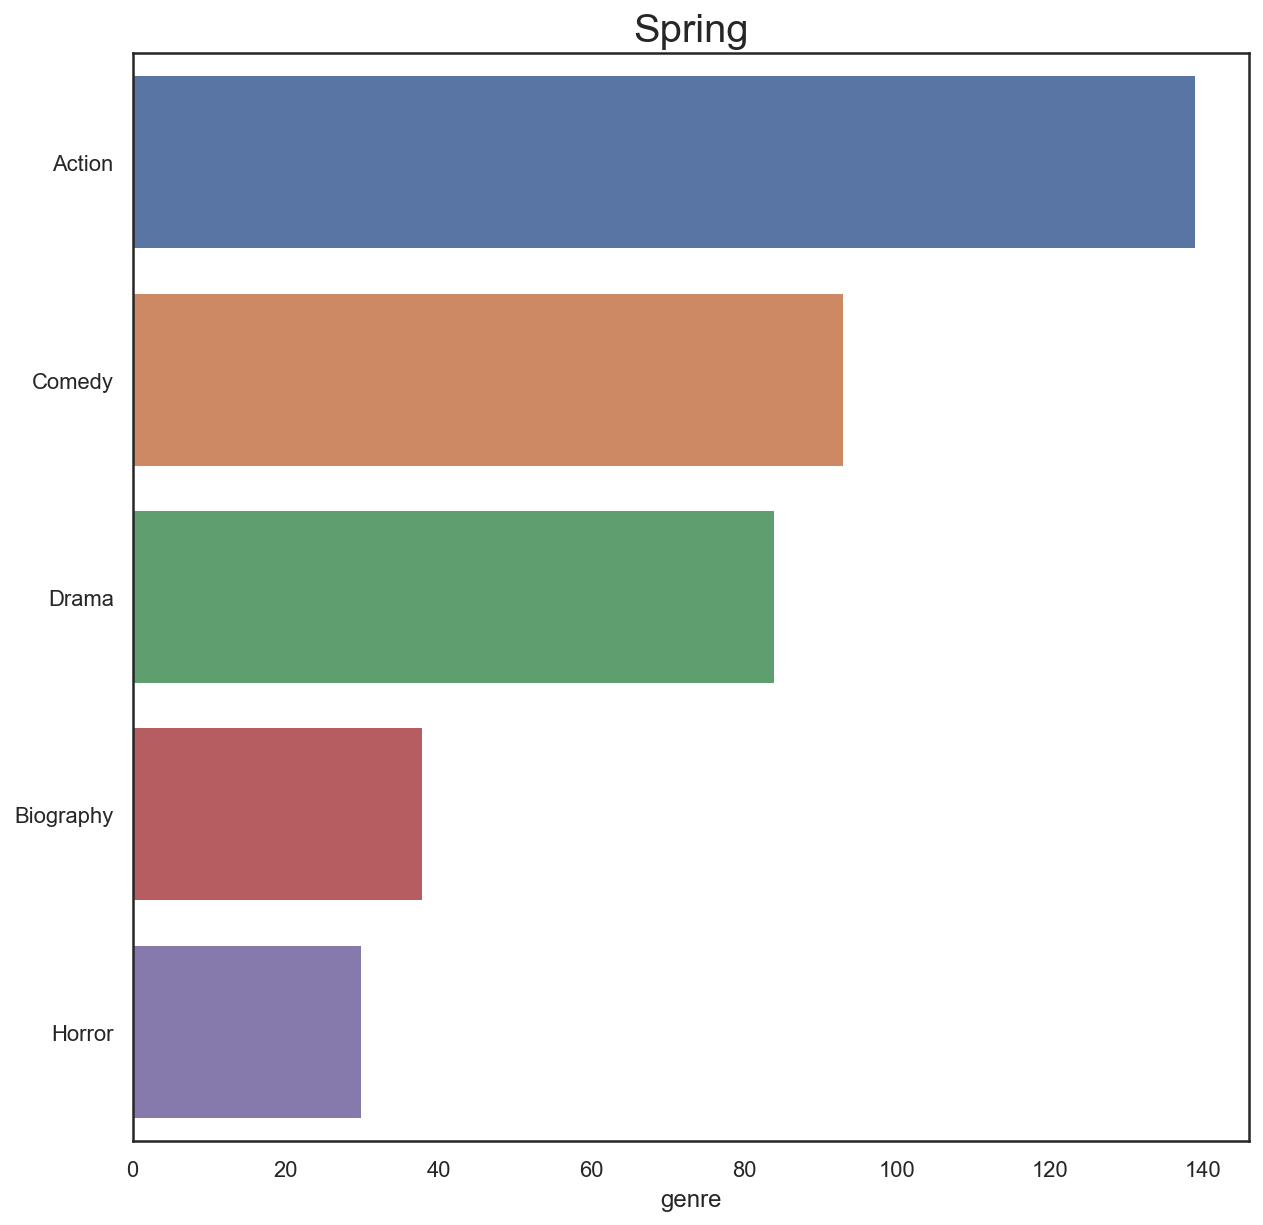

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x=spring_df["genre_first"], y=spring_df.index)
plt.xlabel('genre')
plt.title('Spring', fontsize = 20)
plt.show();

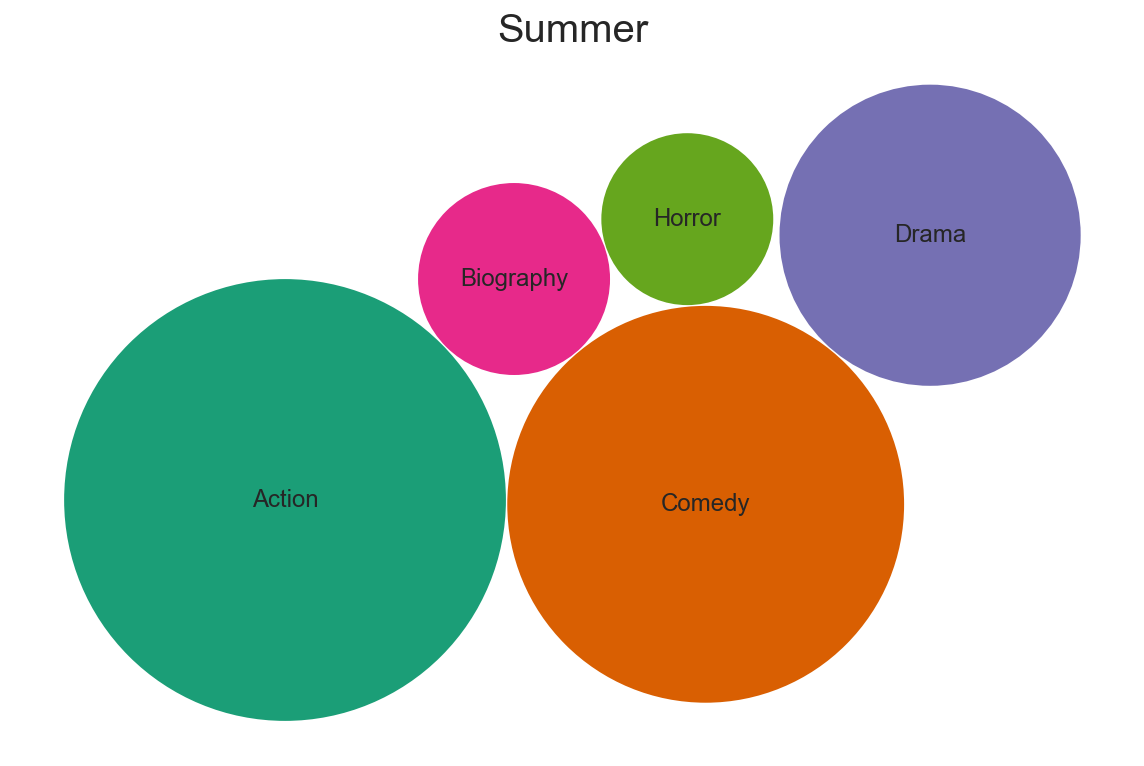

In [39]:
bubble_chart = BubbleChart(area=summer_df["genre_first"], bubble_spacing=0.1)
bubble_chart.collapse()
fig, ax = plt.subplots(figsize=(10,10),subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, summer_df.index, color )
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Summer',  fontsize = 20)
plt.show();

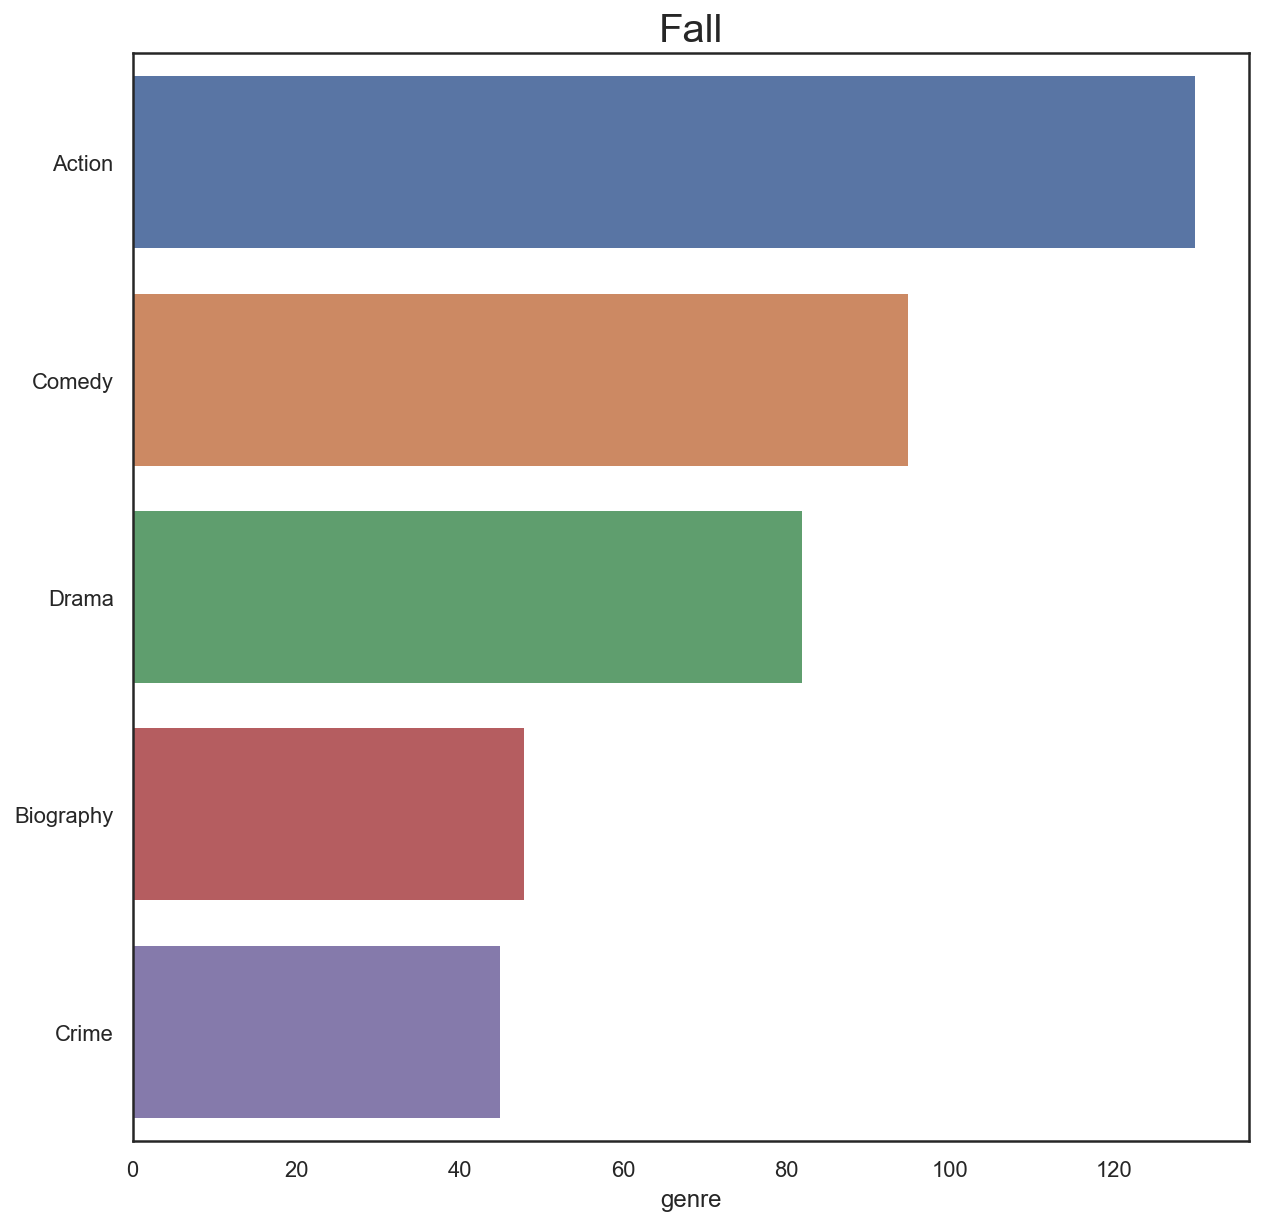

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x=Fall_df["genre_first"], y=Fall_df.index)
plt.xlabel('genre')
plt.title('Fall', fontsize = 20)
plt.show();

### 5. 원작

In [41]:
book = pd.read_csv('books.csv')
book  = book.drop(['id','book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
          'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
          'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url'], axis=1)

# 중복 열 제거
movie_book = pd.merge(movie, book, left_on='original_title', right_on='original_title', how='left')
movie_book = movie_book.drop([711,712, 830, 1021, 1275, 1444, 1456, 1457, 1458, 1458, 1459])
movie_book = movie_book.reset_index(drop=True)

# Labelencoder로 0,1로 변환
onehot = movie_book['title_y'].fillna(0)
onehot = onehot.astype('bool')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
is_onehot = le.fit_transform(onehot)
movie_book['book_label'] = pd.DataFrame(is_onehot)


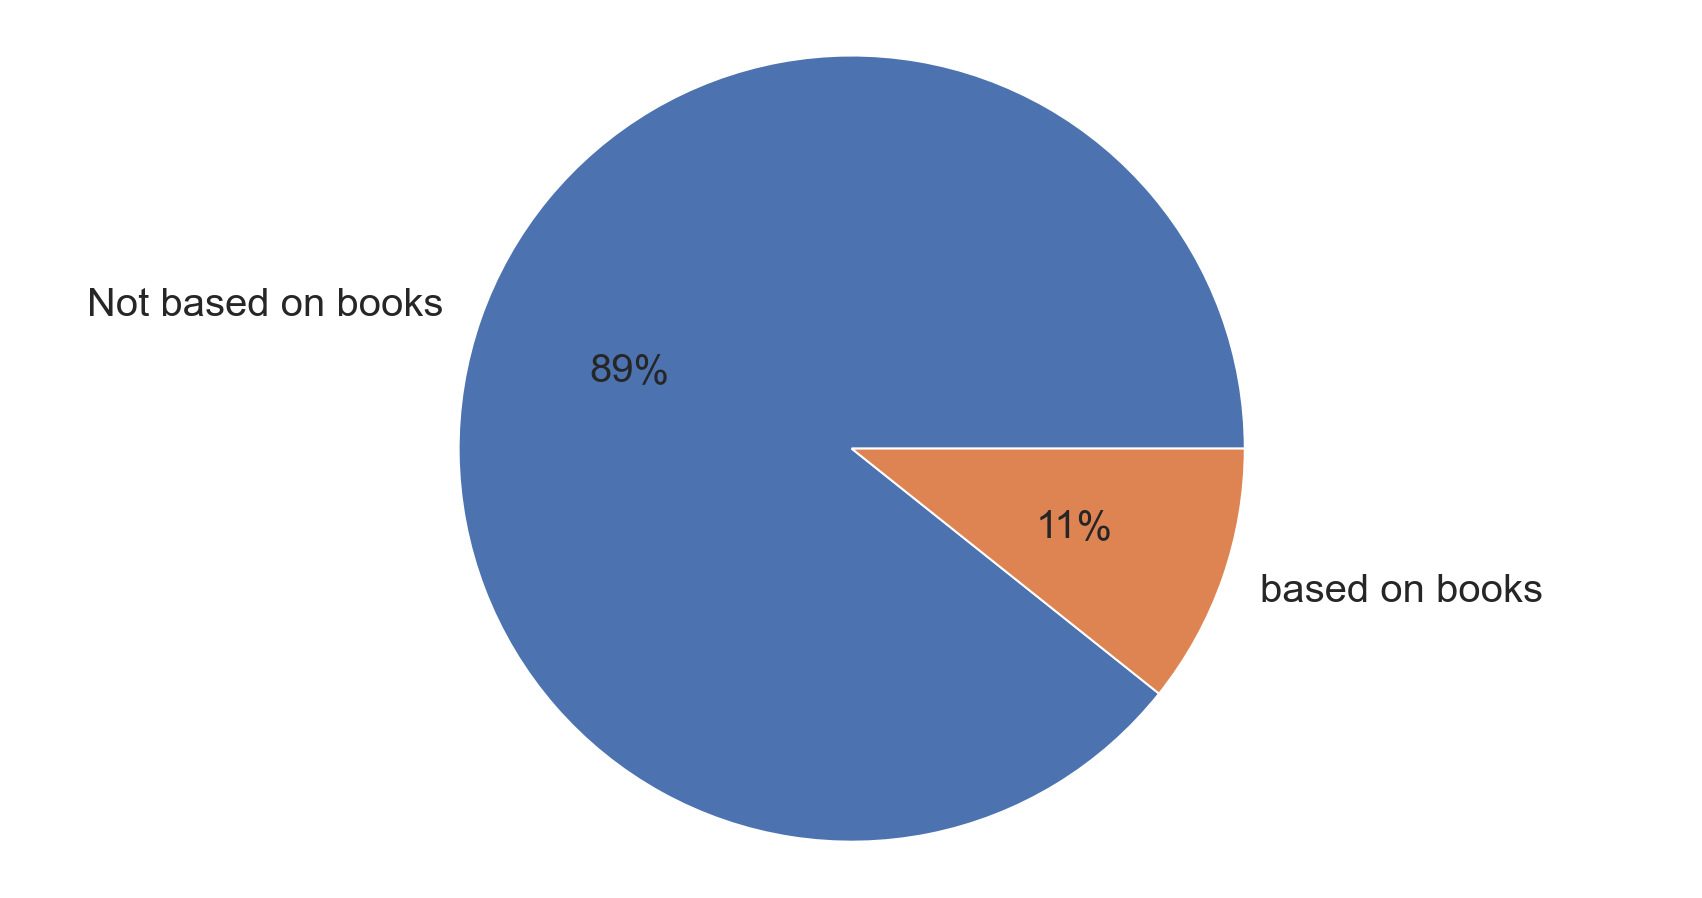

In [42]:
#### 원작 유무
plt.figure(figsize=(15,8))

ratio = movie_book['book_label'].value_counts()
labels = ['Not based on books', 'based on books']

plt.pie(ratio, labels=labels, autopct='%.0f%%', counterclock=True, 
        textprops={'fontsize': 20})

plt.axis('equal')
plt.show()

In [43]:
def baseonbooks (row):
    if row == 0:
        return "Not based on books"
    if row == 1:
        return "base on books"

In [44]:
basedonbook_money = movie_book[['original_title','budget','worldwide_gross_income','book_label']]
basedonbook_money['book_label'] = basedonbook_money['book_label'].astype(object)
basedonbook_money['book_label2'] = basedonbook_money['book_label'].apply(baseonbooks)

In [45]:
#### 원작유무에 따른 매출과 예산 비교
def get_original(data):
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    sns.boxplot(x=data['book_label2'], y= data['budget'])
    plt.xlabel("budget", fontsize=20)
    plt.ylabel("amount", fontsize=20)
    plt.subplot(222)
    sns.boxplot(x=data['book_label2'], y= data['worldwide_gross_income'])
    plt.xlabel("worldwide gross income", fontsize=20)
    plt.ylabel("amout", fontsize=20)
    plt.tight_layout()
    plt.show()

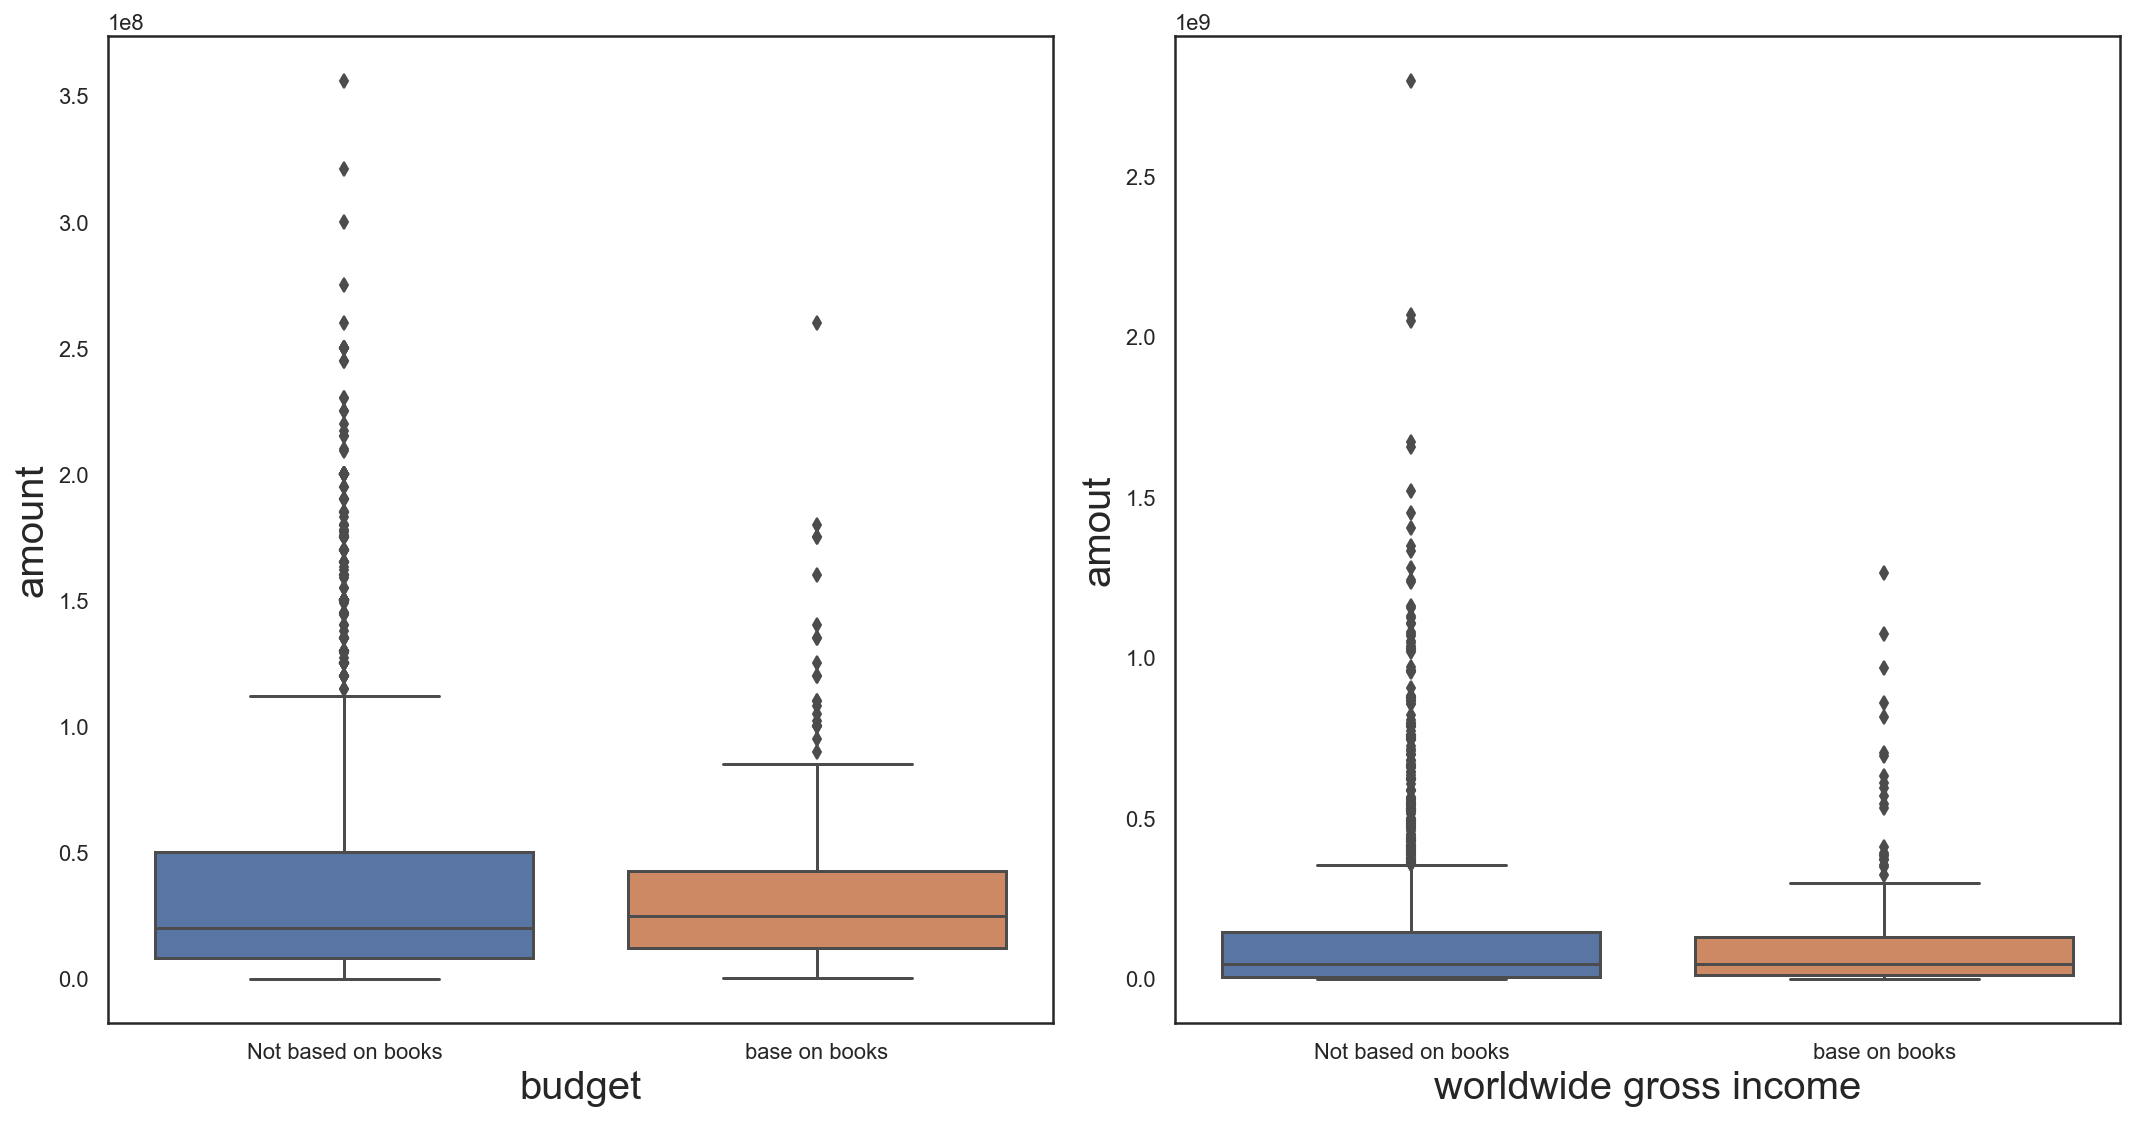

In [46]:
#### 원작유무에 따른 매출과 예산 비교
get_original(basedonbook_money)

### 6. 아카데미

In [47]:
### 6. 아카데미
#### 0. 전체 영화 중 아카데미 수상 분포 - 매출액, 예산액 분포 포함
#### 1. 아카데미 수상 감독 - 매출액, 예산액 분포
#### 2. 아카데미 수상 배우 - 매출액, 예산액 분포
#### 3. 아카데미 수상 작가 - 매출액, 예산액 분포

In [48]:
df = oscar[oscar['year_film'] >= 2010]
dummy = pd.get_dummies(df['category2'])
oscar_df = pd.concat([df,dummy],1)
oscar_df

year_film  year_ceremony  ceremony  \
1762       2010           2011        83   
1763       2010           2011        83   
1764       2010           2011        83   
1765       2010           2011        83   
1766       2010           2011        83   
...         ...            ...       ...   
1988       2019           2020        92   
1989       2019           2020        92   
1990       2019           2020        92   
1991       2019           2020        92   
1992       2019           2020        92   

                                                   name               film  \
1762                                        Colin Firth  The King's Speech   
1763                                     Christian Bale        The Fighter   
1764                                    Natalie Portman         Black Swan   
1765                                        Melissa Leo        The Fighter   
1766                                        Lee Unkrich        Toy Story 3   
...                                                 ...                ...   
1988                                   Donald Sylvester     Ford v Ferrari   
1989                      Mark Taylor and Stuart Wilson               1917   
1990  Guillaume Rocheron, Greg Butler and Dominic Tuohy               1917   
1991                        Screenplay by Taika Waititi        Jojo Rabbit   
1992  Screenplay by Bong Joon Ho, Han Jin Won; Story...           Parasite   

      winner           category2  ACTOR  ACTOR SUPPORTING  ACTRESS  \
1762    True               ACTOR      1                 0        0   
1763    True    ACTOR SUPPORTING      0                 1        0   
1764    True             ACTRESS      0                 0        1   
1765    True  ACTRESS SUPPORTING      0                 0        0   
1766    True                 ETC      0                 0        0   
...      ...                 ...    ...               ...      ...   
1988    True                 ETC      0                 0        0   
1989    True                 ETC      0                 0        0   
1990    True                 ETC      0                 0        0   
1991    True             WRITING      0                 0        0   
1992    True             WRITING      0                 0        0   

      ACTRESS SUPPORTING  BEST PICTURE  CINEMATOGRAPHY  DIRECTING  ETC  \
1762                   0             0               0          0    0   
1763                   0             0               0          0    0   
1764                   0             0               0          0    0   
1765                   1             0               0          0    0   
1766                   0             0               0          0    1   
...                  ...           ...             ...        ...  ...   
1988                   0             0               0          0    1   
1989                   0             0               0          0    1   
1990                   0             0               0          0    1   
1991                   0             0               0          0    0   
1992                   0             0               0          0    0   

      WRITING  
1762        0  
1763        0  
1764        0  
1765        0  
1766        0  
...       ...  
1988        0  
1989        0  
1990        0  
1991        1  
1992        1  

[231 rows x 16 columns]

In [49]:
df4 = oscar_df[oscar_df.duplicated(['film'])]
df4 = df4.groupby("film").size().reset_index(name="count")
df4 = df4.sort_values(by="count", ascending=False)
df4 = df4.reset_index(drop=True)

In [50]:
df4.at[0,'film'] = 'Birdman' 
df4.at[10,'film'] = 'Manchester' + '\n' + 'by the Sea' 
df4.at[19,'film'] = 'Three Billboards' 

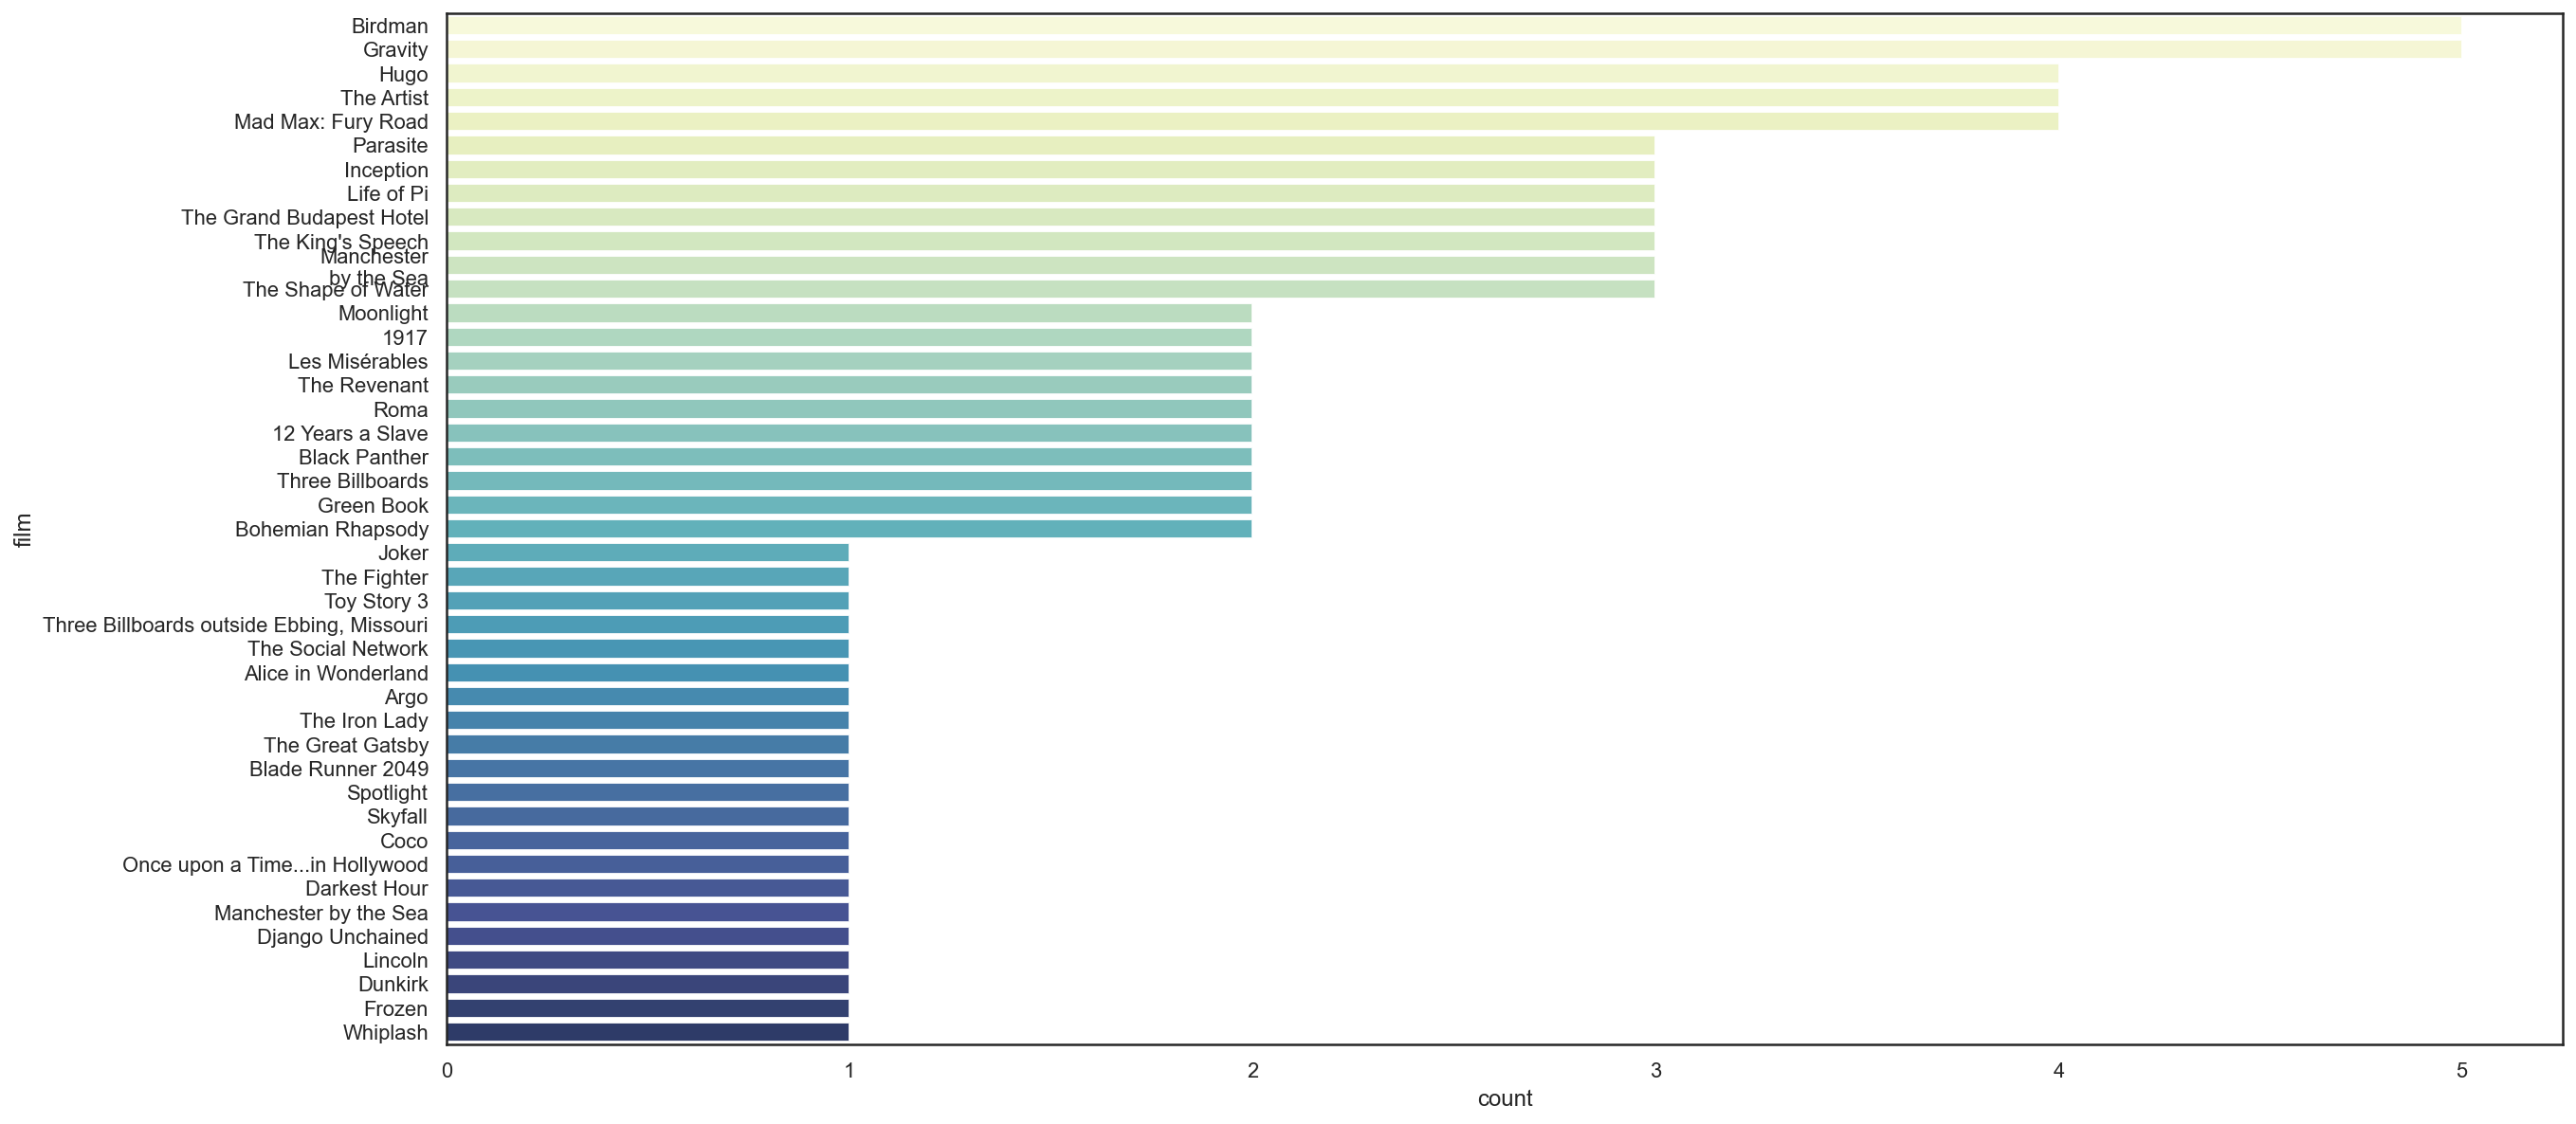

In [51]:
## 2010 ~ 2019년 영화별 오스카상 수상 횟수
plt.figure(figsize=(20,10))
sns.barplot(x=df4["count"], y=df4["film"], alpha=0.9, palette='YlGnBu')
plt.show()

In [52]:
oscar_df = df.drop_duplicates(['film'], keep=False)
oscar_df = oscar_df.rename(columns = {'film' : 'title'})
oscar_df = oscar_df.reset_index(drop=True)
oscar_df.tail(2)

year_film  year_ceremony  ceremony                         name  \
102       2019           2020        92             Donald Sylvester   
103       2019           2020        92  Screenplay by Taika Waititi   

              title  winner category2  
102  Ford v Ferrari    True       ETC  
103     Jojo Rabbit    True   WRITING

In [53]:
df_2 = pd.merge(movie, oscar_df, how='inner')

In [54]:
df_2 = df_2[['title', 'metascore', 'budget', 'worldwide_gross_income']]

In [55]:
oscar_df_2 = df_2.sort_values(by='worldwide_gross_income', ascending=False).reset_index(drop=True)
oscar_df_3 = df_2.sort_values(by='budget', ascending=False).reset_index(drop=True)
oscar_df_4 = df_2.sort_values(by='metascore', ascending=False).reset_index(drop=True)

In [56]:
## 오스카 수상작의 매출과 예산 비교
def oscar_income(data, data2):
    plt.figure(figsize=(12,12))

    plt.subplot(221)
    sns.barplot(x=data["worldwide_gross_income"], y=data["title"], alpha=0.9, palette='gist_rainbow_r')
    plt.xticks(rotation = 90)

    plt.subplot(222)
    sns.barplot(x=data2["budget"], y=data2["title"], alpha=0.9, palette='icefire')
    plt.xticks(rotation = 90)

    plt.tight_layout()
    plt.show()

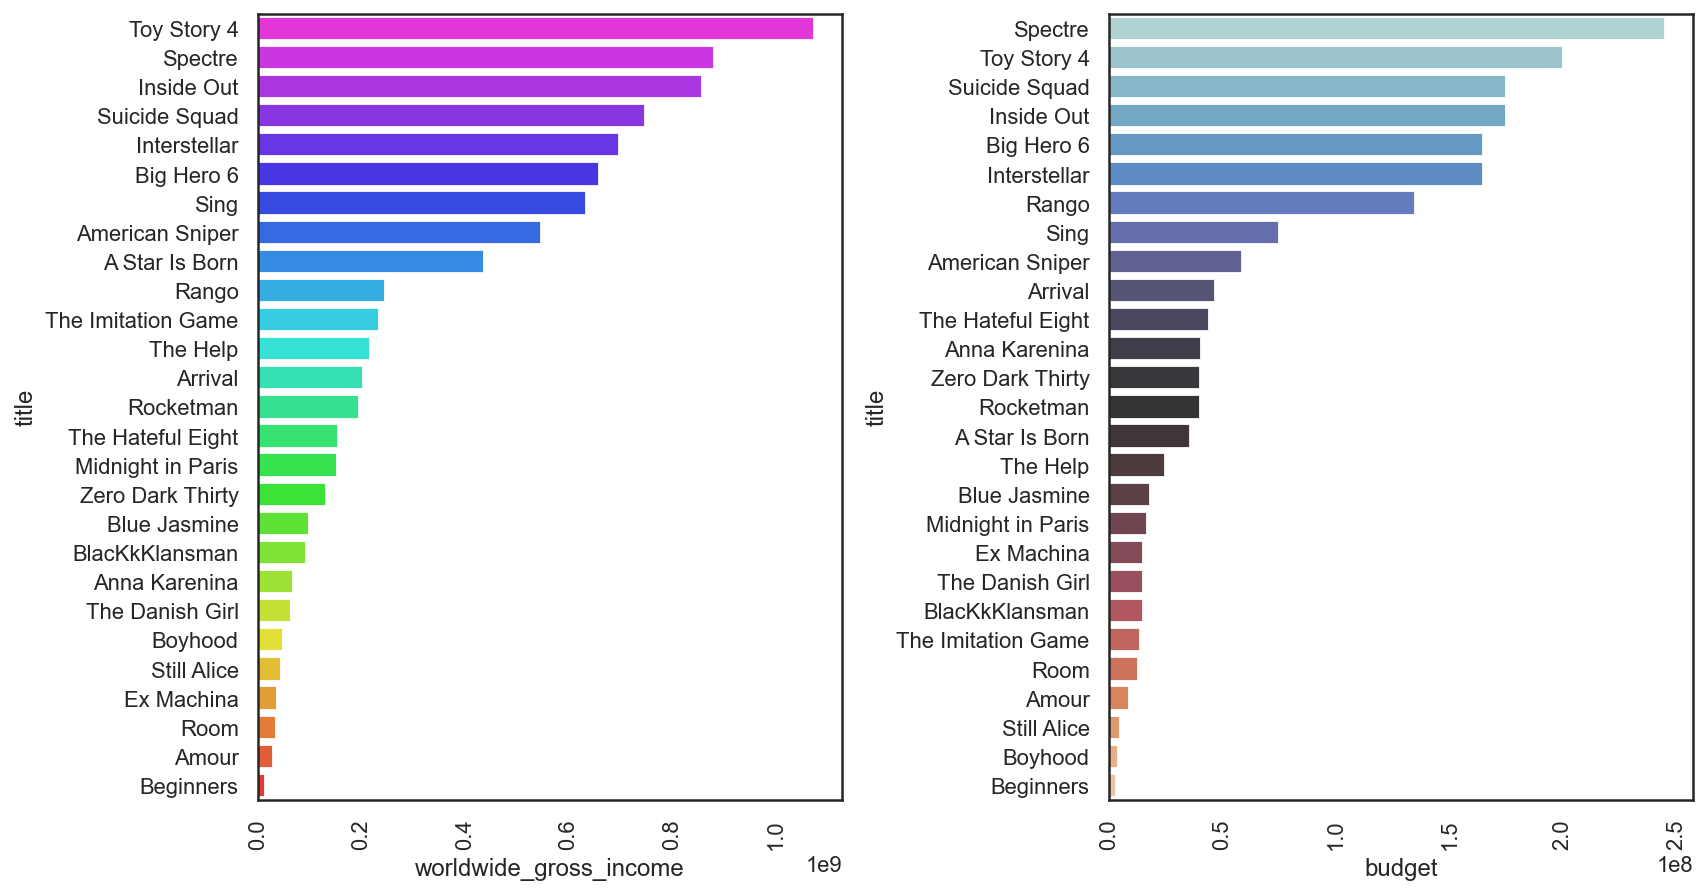

In [57]:
## 오스카 수상작의 매출과 예산 비교
oscar_income(oscar_df_2, oscar_df_3)

In [58]:
## 오스카 수상작의 매출과 메타스코어 비교
def oscar_meta(data, data2):
    plt.figure(figsize=(12,12))

    plt.subplot(221)
    sns.barplot(x=data["worldwide_gross_income"], y=data["title"], alpha=0.9, palette='gist_rainbow_r')
    plt.xticks(rotation = 90)

    plt.subplot(222)
    sns.barplot(x=data2["metascore"], y=data2["title"], alpha=0.9, palette='icefire')
    plt.xticks(rotation = 90)

    plt.tight_layout()
    plt.show()

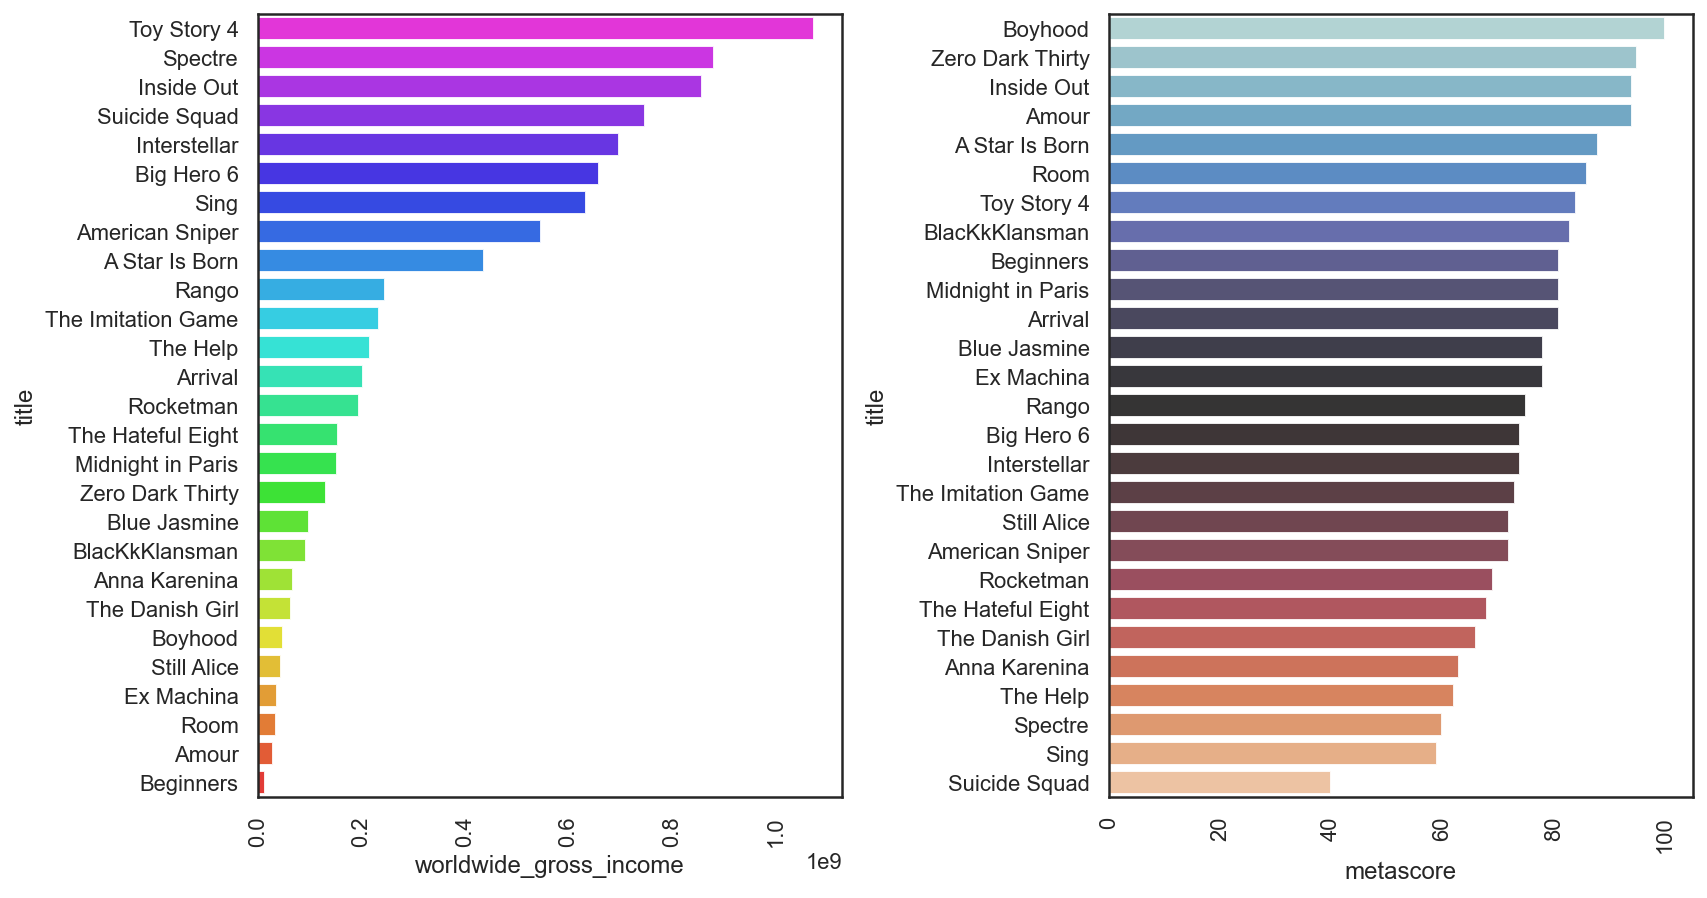

In [59]:
## 오스카 수상작의 매출과 메타스코어 비교
oscar_meta(oscar_df_2, oscar_df_4)

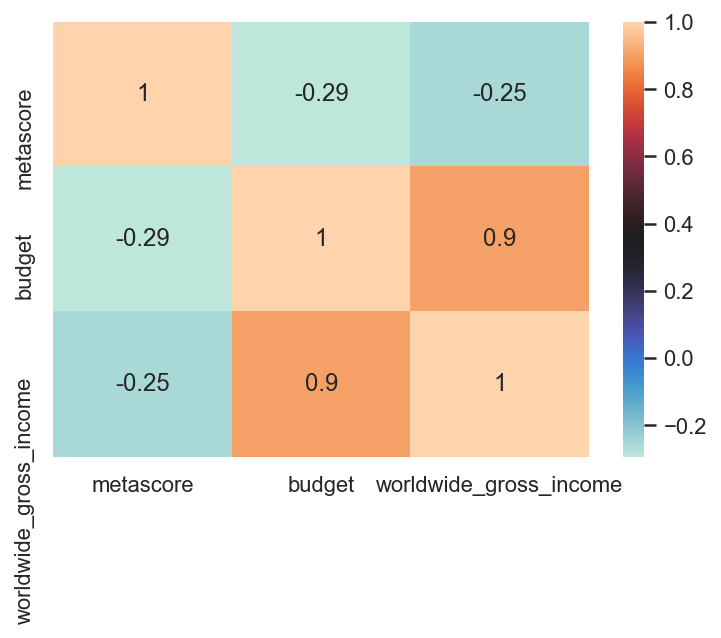

In [60]:
sns.heatmap(df_2.corr(), cmap="icefire", annot=True)
plt.show()

- 오스카 수상작의 총수익(매출) 순으로 봤을때와 예산 순으로 봤을때 상관관계가 있다.
- 오스카 수상작의 총수익(매출) 순과 일반 평론가들의 평점으로 봤을때는 약한 음의 상관관계가 있었다. metascore가 높다고해서 오스카 수상작의 수익이 높은 것은 아닌듯,,

## 영화별 수입 TOP20

In [61]:
dirt_df = movie[['original_title', 'country', 'year', 'director', 'budget', 'worldwide_gross_income']]
dirt_df = dirt_df.sort_values(by="worldwide_gross_income", ascending=False)
dirt_df = dirt_df[:20]

In [62]:
dirt_df2= movie[['original_title', 'year', 'director', 'budget', 'worldwide_gross_income']]
dirt_df2 = dirt_df2.sort_values(by="budget", ascending=False)
dirt_df2 = dirt_df2.reset_index(drop=True)
dirt_df2 = dirt_df2[:20]

In [63]:
def dircetor_income(data, data2):
    plt.figure(figsize=(12,12))

    plt.subplot(221)
    sns.barplot(x=data["worldwide_gross_income"], y=data["original_title"], alpha=0.9, palette='Set1')

    plt.subplot(222)
    sns.barplot(x=data2["budget"], y=data2["original_title"], alpha=0.9, palette='Set3')

    plt.tight_layout()
    plt.show()

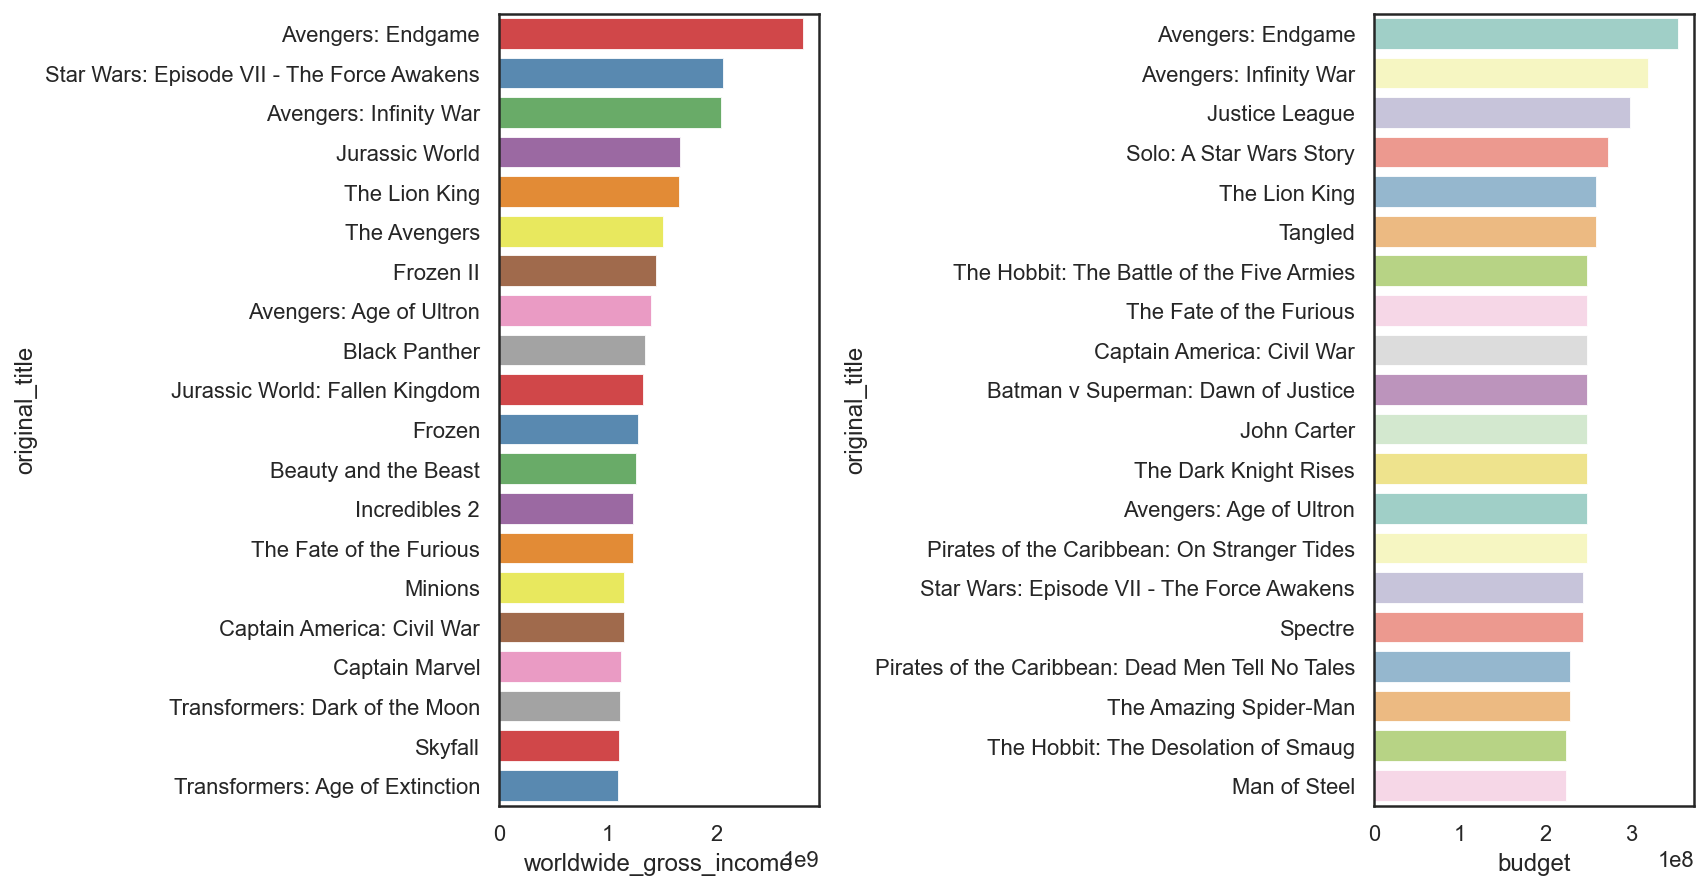

In [64]:
dircetor_income(dirt_df, dirt_df2)

## 투자 수익률 ((수익 / 예산) * 100)
총수익 예측에서 좀 더 정확한 수익을 보기위해\
영화로 얻은 예산 대비 수익(ROI)를 계산하여 컬럼을 추가해보았다.

In [65]:
movie_roi = movie[['title','genre', 'worldwide_gross_income', 'budget']]
movie_roi['ROI'] = (movie['worldwide_gross_income']/movie['budget']) * 100
movie_roi = pd.DataFrame(movie_roi)

In [66]:
movie_roi = movie_roi.sort_values(by="ROI", ascending=False)
movie_roi = movie_roi.reset_index(drop=True)
movie_roi

title                      genre  \
0     The Gallows - L'esecuzione    Horror, Mystery, Sci-Fi   
1     L'altra faccia del diavolo                     Horror   
2            Le origini del male  Horror, Mystery, Thriller   
3                      Searching   Drama, Mystery, Thriller   
4                      Insidious  Horror, Mystery, Thriller   
...                          ...                        ...   
1750             Volano coltelli                      Drama   
1751                    Supercon             Action, Comedy   
1752               Burning Palms           Comedy, Thriller   
1753         Un amore di collega     Comedy, Music, Romance   
1754                 Speed Kills       Action, Crime, Drama   

      worldwide_gross_income    budget           ROI  
0                   42964410    100000  42964.410000  
1                  101758490   1000000  10175.849000  
2                   17835162    200000   8917.581000  
3                   75462037    880000   8575.231477  
4                   99557032   1500000   6637.135467  
...                      ...       ...           ...  
1750                    5661   7000000      0.080871  
1751                    3982   5500000      0.072400  
1752                    3271   5000000      0.065420  
1753                    7162  18000000      0.039789  
1754                    5812  15000000      0.038747  

[1755 rows x 5 columns]

In [67]:
roi_20 = movie_roi[:20]

<Figure size 864x864 with 0 Axes>

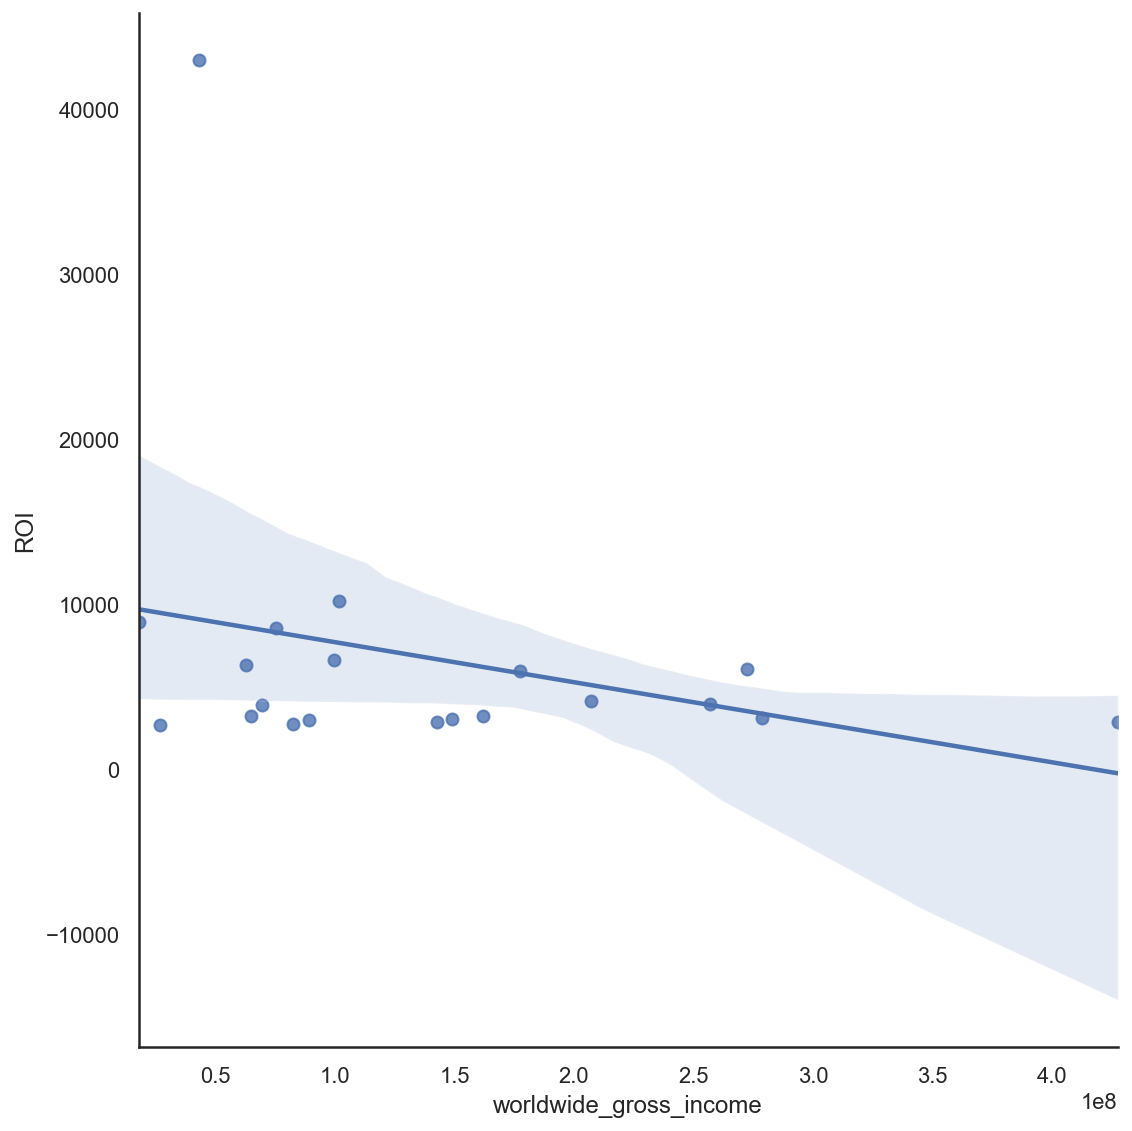

In [68]:
# ROI와 매출의 선형성
plt.figure(figsize=(12,12))

sns.lmplot(x="worldwide_gross_income", y="ROI", height=8, data=roi_20)
plt.tight_layout()
plt.show()

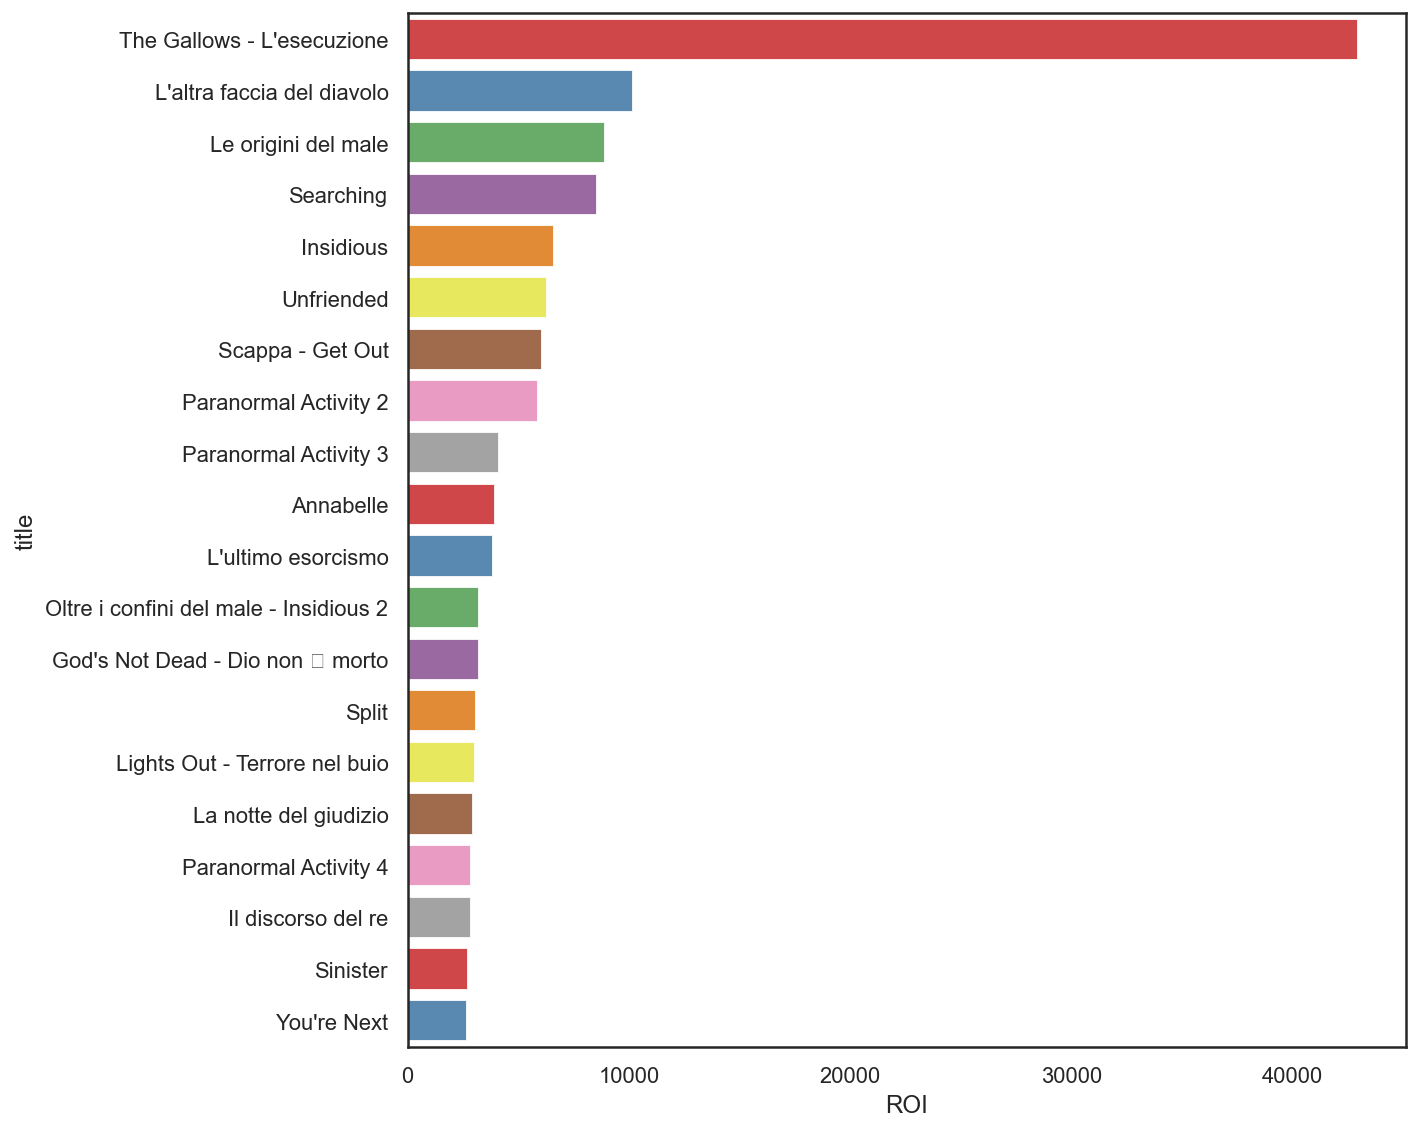

In [69]:
# ROI top 20
plt.figure(figsize=(10,8))
sns.barplot(x=roi_20["ROI"], y=roi_20["title"], alpha=0.9, palette='Set1')
plt.tight_layout()
plt.show()

# ROI 가 높은 영화들의 장르 확인

In [70]:
roi_20_genre = roi_20[['title', 'genre', 'ROI']]

In [71]:
roi_20_genre1 = roi_20_genre['genre'].str.split(',').str[0]
roi_20_genre2 = roi_20_genre['genre'].str.split(',').str[1]
roi_20_genre3 = roi_20_genre['genre'].str.split(',').str[2]

In [72]:
roi_genre = pd.concat([roi_20_genre, pd.DataFrame(roi_20_genre1), pd.DataFrame(roi_20_genre2),
                      pd.DataFrame(roi_20_genre3)], 1)

In [73]:
roi_genre.columns = ['title', 'full_genre', 'ROI', 'genre1', 'gerne2', 'genre3']

In [74]:
roi_genre

title                 full_genre  \
0               The Gallows - L'esecuzione    Horror, Mystery, Sci-Fi   
1               L'altra faccia del diavolo                     Horror   
2                      Le origini del male  Horror, Mystery, Thriller   
3                                Searching   Drama, Mystery, Thriller   
4                                Insidious  Horror, Mystery, Thriller   
5                               Unfriended  Horror, Mystery, Thriller   
6                         Scappa - Get Out  Horror, Mystery, Thriller   
7                    Paranormal Activity 2                     Horror   
8                    Paranormal Activity 3  Horror, Mystery, Thriller   
9                                Annabelle  Horror, Mystery, Thriller   
10                      L'ultimo esorcismo  Horror, Mystery, Thriller   
11  Oltre i confini del male - Insidious 2  Horror, Mystery, Thriller   
12        God's Not Dead - Dio non � morto                      Drama   
13                                   Split           Horror, Thriller   
14           Lights Out - Terrore nel buio     Drama, Horror, Mystery   
15                   La notte del giudizio           Horror, Thriller   
16                   Paranormal Activity 4  Horror, Mystery, Thriller   
17                      Il discorso del re  Biography, Drama, History   
18                                Sinister  Horror, Mystery, Thriller   
19                             You're Next  Horror, Mystery, Thriller   

             ROI     genre1     gerne2     genre3  
0   42964.410000     Horror    Mystery     Sci-Fi  
1   10175.849000     Horror        NaN        NaN  
2    8917.581000     Horror    Mystery   Thriller  
3    8575.231477      Drama    Mystery   Thriller  
4    6637.135467     Horror    Mystery   Thriller  
5    6288.209000     Horror    Mystery   Thriller  
6    6055.562511     Horror    Mystery   Thriller  
7    5917.067733     Horror        NaN        NaN  
8    4140.796880     Horror    Mystery   Thriller  
9    3954.579400     Horror    Mystery   Thriller  
10   3857.362611     Horror    Mystery   Thriller  
11   3238.386360     Horror    Mystery   Thriller  
12   3233.817450      Drama        NaN        NaN  
13   3093.937311     Horror   Thriller        NaN  
14   3038.139490      Drama     Horror    Mystery  
15   2977.620900     Horror   Thriller        NaN  
16   2856.053140     Horror    Mystery   Thriller  
17   2849.162113  Biography      Drama    History  
18   2750.503767     Horror    Mystery   Thriller  
19   2689.548100     Horror    Mystery   Thriller

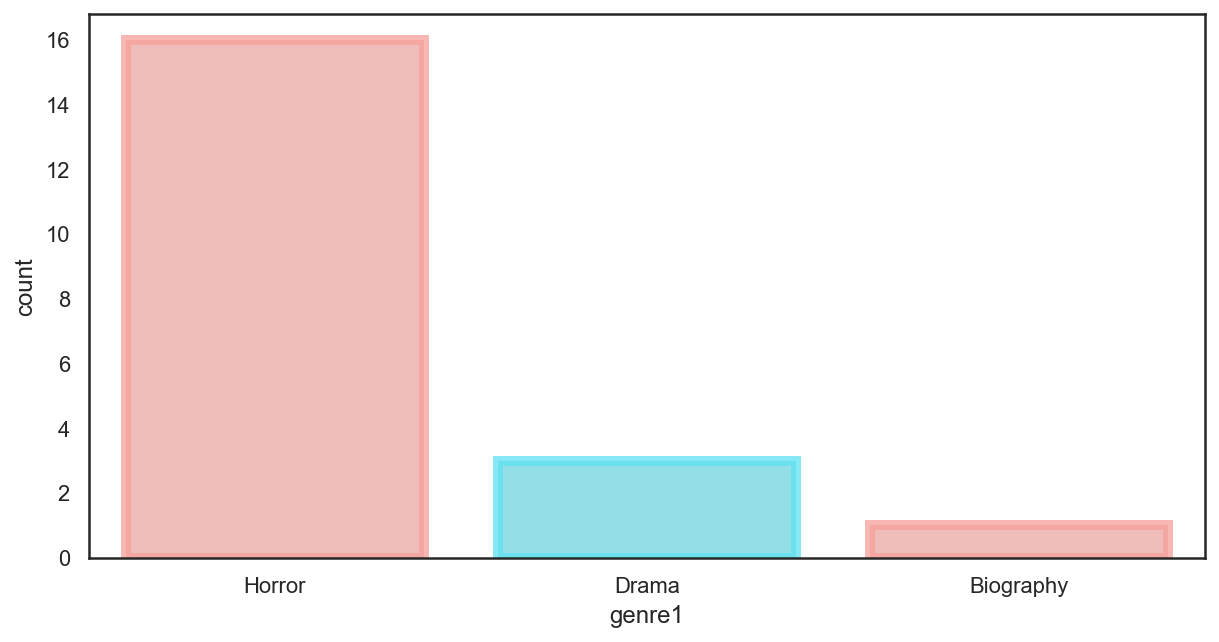

In [75]:
plt.figure(figsize=(10,5))
clrs = ["#F69F98", "#5EE1F1"]
sns.set_theme(style="white")
t_ax = sns.countplot(x="genre1", data=roi_genre, palette=sns.color_palette(clrs), alpha=0.75, edgecolor=clrs)
plt.setp(t_ax.patches, linewidth=5)   
plt.show()

## 감독 파워를 찾기 위한 분석

In [76]:
director_df = movie[['title','director', 'budget','worldwide_gross_income','metascore','avg_vote','duration']]

In [77]:
director1 = director_df['director'].str.split(',').str[0]
director2 = director_df['director'].str.split(',').str[1]

In [78]:
directors = pd.concat([director_df,pd.DataFrame(director1),pd.DataFrame(director2)], 1)

In [79]:
directors.columns = ['title','director', 'budget', 'worldwide_gross_income', 'metascore', 'avg_vote', 'duration', 'director1', 'director2']

In [80]:
## 감독이 한명일때
df1 = directors
df1['director2'] = df1['director2'].fillna(0)
director1_df = df1[df1['director2'] == 0]
director1_df = director1_df.sort_values(by='worldwide_gross_income', ascending=False)
director1_df = director1_df.reset_index(drop=True)

In [81]:
director1_df = director1_df.drop('director2',1)

In [82]:
dit1 = director1_df.describe()

In [83]:
## 감독이 두명일때
director2_df = df1[df1['director2'] != 0]
director2_df = director2_df.sort_values(by='worldwide_gross_income', ascending=False)
director2_df = director2_df.reset_index(drop=True)
dit2 = director2_df.describe()

In [84]:
dit1 = dit1.drop(['metascore', 'avg_vote', 'duration'],1)
dit2 = dit2.drop(['metascore', 'avg_vote', 'duration'],1)

In [85]:
data1 = pd.concat([dit1[['budget']], dit2[['budget']]],1)
data2 = pd.concat([dit1[['worldwide_gross_income']], dit2[['worldwide_gross_income']]],1)

In [86]:
data1.columns = ['director1_budget', 'director2_budget']
data2.columns = ['director1_income', 'director2_income']

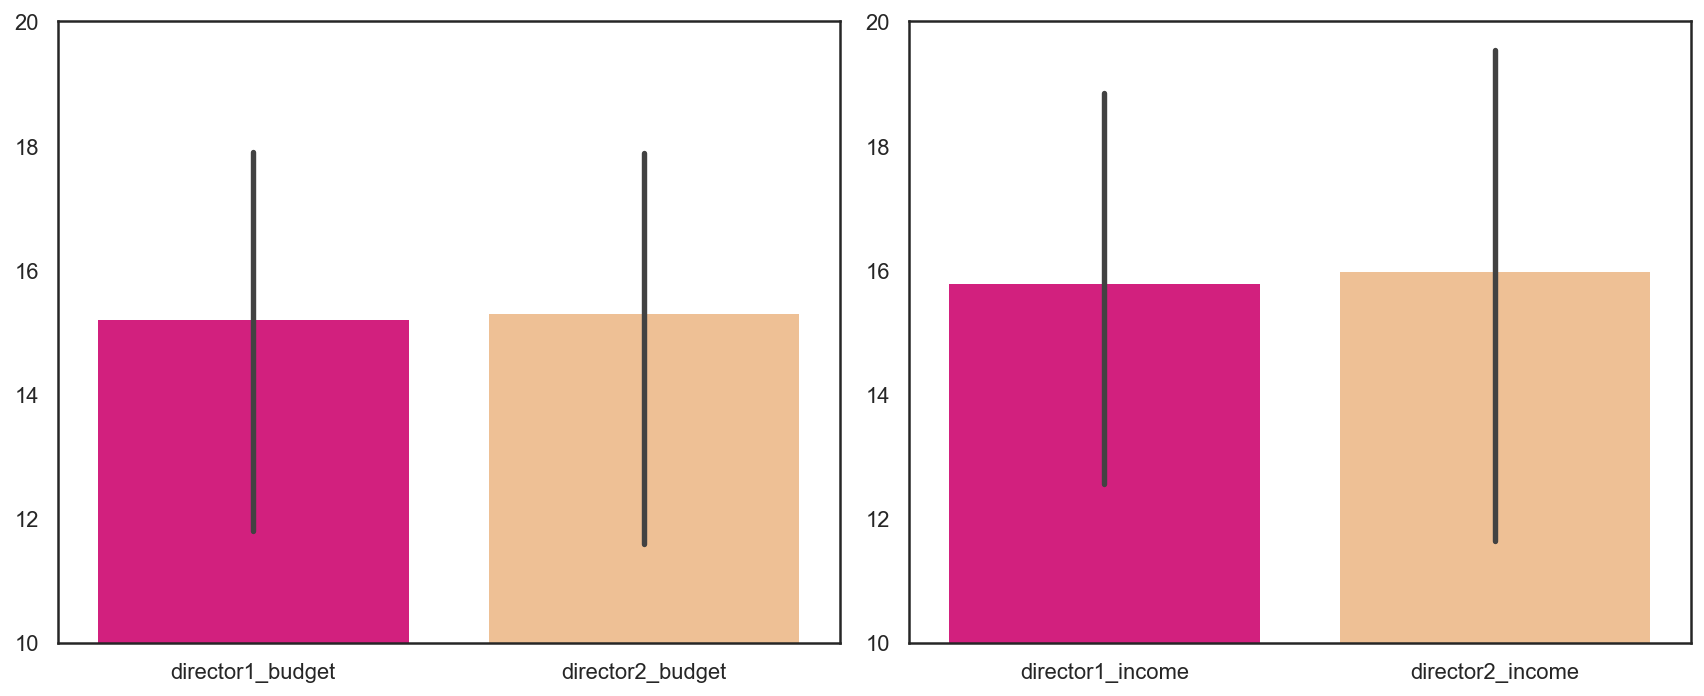

In [87]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.barplot(data=np.log(data1), palette='Accent_r')
plt.ylim(10.0, 20.0)

plt.subplot(122)
sns.barplot(data=np.log(data2), palette='Accent_r')
plt.ylim(10.0, 20.0)

plt.tight_layout()
plt.show()

## 감독 별 10년동안 영화의 수

In [88]:
d_encoder = directors
drt = (d_encoder.groupby('director').size())
d_encoder['director_ratio'] = d_encoder['director'].apply(lambda x : drt[x])
d_encoder = d_encoder.sort_values(by='director_ratio', ascending=False)
d_encoder = d_encoder.reset_index(drop=True)
d_encoder = d_encoder.rename(columns={'director_ratio':'director_count'})
d_encoder

title              director    budget  \
0                               Sully        Clint Eastwood  60000000   
1        Ore 15:17 - Attacco al treno        Clint Eastwood  30000000   
2              Il corriere - The Mule        Clint Eastwood  50000000   
3                      Richard Jewell        Clint Eastwood  45000000   
4                         Jersey Boys        Clint Eastwood  40000000   
...                               ...                   ...       ...   
1750         Gotti - Il primo padrino        Kevin Connolly  10000000   
1751                       Little Boy  Alejandro Monteverde  20000000   
1752  Nut Job - Operazione noccioline      Peter Lepeniotis  42000000   
1753                   Make Your Move           Duane Adler  15000000   
1754    Lo sguardo di Satana - Carrie       Kimberly Peirce  30000000   

      worldwide_gross_income  metascore  avg_vote  duration  \
0                  240797623         74       7.4        96   
1                   57076286         45       5.2        94   
2                  174804407         58       7.0       116   
3                   43745542         68       7.5       131   
4                   67647013         54       6.8       134   
...                      ...        ...       ...       ...   
1750                 6412349         24       4.8       112   
1751                17572289         30       7.4       106   
1752               120885527         37       5.7        85   
1753                 1583687         40       5.7       110   
1754                84790678         53       5.9       100   

                 director1 director2  director_count  
0           Clint Eastwood         0               8  
1           Clint Eastwood         0               8  
2           Clint Eastwood         0               8  
3           Clint Eastwood         0               8  
4           Clint Eastwood         0               8  
...                    ...       ...             ...  
1750        Kevin Connolly         0               1  
1751  Alejandro Monteverde         0               1  
1752      Peter Lepeniotis         0               1  
1753           Duane Adler         0               1  
1754       Kimberly Peirce         0               1  

[1755 rows x 10 columns]

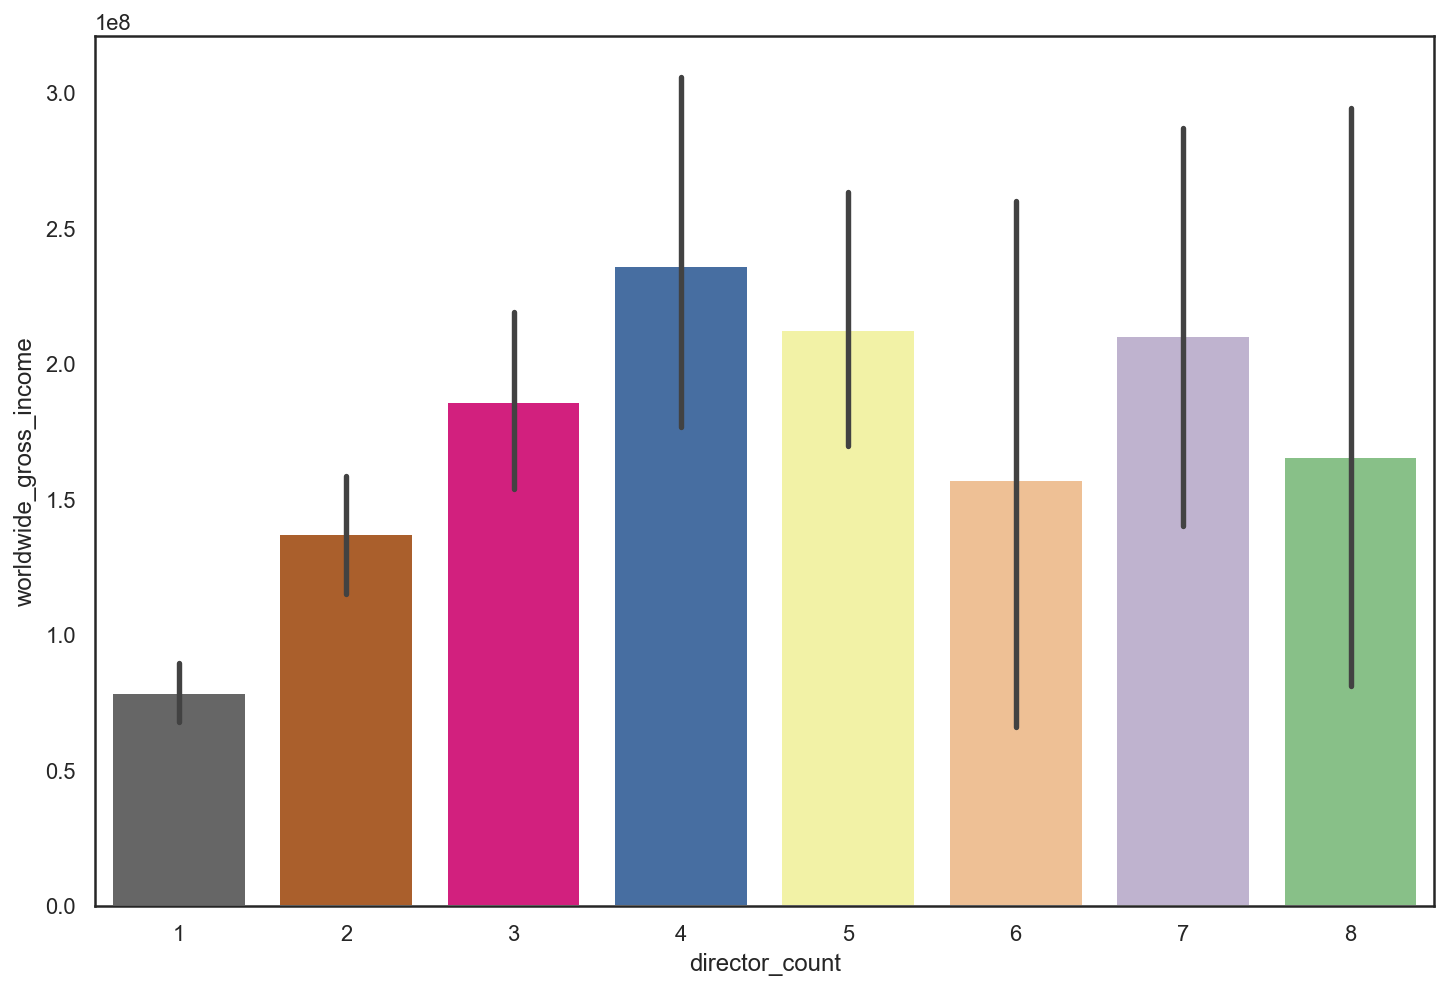

In [89]:
plt.figure(figsize=(12, 8))
sns.barplot(data=d_encoder, x=d_encoder['director_count'], y=d_encoder['worldwide_gross_income'], palette='Accent_r')
plt.show()